<a href="https://colab.research.google.com/github/madsondeluna/mvp_pucrio_data_analysis/blob/main/mvp_pucrio_data_analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados e Boas Práticas

**Data Science & Analytics – PUC-Rio**

**Autor:** Madson Aragão  



# MVP I (Produto Mínimo Viável)

> Análise de Dados e Boas Práticas


## I. Introdução

> **Objetivo Geral:** Validar a viabilidade de classificar dados extraídos a partir de células mamárias em processos de alteração celular (benignas vs. malignas) usando técnicas clássicas de análises de dados baseadas em Python, além de dar início ao preparo do dataset para treinamento e testes de modelos de Aprendizado de Máquina. O projeto também visa explorar a relevância biológica das variáveis envolvidas e avaliar o potencial diagnóstico do modelo.

> Funcionalidades Essenciais:

## Seleção e Carregamento dos Dados

- Importação do arquivo CSV contendo métricas morfológicas extraídas de imagens clínicas.
- Verificação da integridade do dataset (dimensões, tipos de variáveis, rótulos disponíveis).
- Remoção de colunas irrelevantes ou redundantes (ex.: IDs, campos vazios).
- Classificação do tipo de variável (numérica contínua, categórica ou binária) para orientar futuras transformações.
- Identificação prévia de colinearidade, valores extremos e valores faltantes.
- Registro da proporção entre amostras benignas e malignas para verificar eventual desbalanceamento.

## Visualização Exploratória dos Dados

- Análise gráfica da distribuição das variáveis por meio de histogramas, boxplots e pairplots.
- Detecção visual de outliers e padrões por classe (benigno vs. maligno).
- Representação gráfica de correlações via heatmap para identificar redundância entre variáveis.
- Visualização/Exibição (imagem ou texto) da distribuição das classes na base original e após divisão em treino/teste.

## Pré-processamento dos Dados

- Tratamento de valores ausentes e remoção de duplicatas.
- Padronização das variáveis contínuas utilizando z-score (`StandardScaler`).
- Separação dos dados em conjuntos de treino e teste com proporção 75/25, utilizando `train_test_split` e `random_state=10` para reprodutibilidade.
- Verificação da distribuição de classes entre treino e teste para garantir equilíbrio.
- Armazenamento das estatísticas de normalização aplicadas na base de treino para uso posterior.

## Transformação e Mineração de Dados

- Análise de correlações entre variáveis para identificar multicolinearidade.
- Aplicação de PCA (Análise de Componentes Principais) para reduzir dimensionalidade e observar agrupamentos de classes.
- Comparação entre variáveis para avaliar valor das informações.
- Avaliação qualitativa da separação entre classes no espaço transformado.

## Modelo Inicial de Classificação (Extra-MVP)

- Treinamento e avaliação de um classificador KNN (k-Nearest Neighbors) com variação de *k* para análise de desempenho.
- Cálculo de métricas: acurácia, precisão, recall e F1-score com base no conjunto de teste.
- Avaliação visual do desempenho via curvas de decisão, matriz de confusão e curva AUC-ROC.
- Avaliação do Matthews Correlation Coefficient (MCC), uma métrica robusta para avaliação de modelos de classificação binária, especialmente eficaz em cenários com classes desbalanceadas, onde métricas como acurácia podem ser enganosas.


## Relatório de Resultados (Extra-MVP)

- Tabela sumarizando as principais métricas por valor de *k*.
- Exibição da curva ROC com cálculo da AUC.
- Discussão dos erros (falsos positivos e negativos) e suas implicações clínicas.
- Indicação de configurações de *k* que maximizam a performance sem sobreajuste.

## Checklist

- `(OK)` Pipeline executando sem erros do início ao fim, com resultados reprodutíveis.
- `(OK)` Código documentado e validado em ambiente Jupyter.
- `(OK)` Notebook estruturado com seções claras: título, objetivos, hipóteses, análise, conclusões.
- `(OK)` MVP devidamente depositado, formatado e compartilhado via GitHub.

---

## II. Contexto da Base de Dados

Nesta análise, usamos uma base de ultrassonografia de imagens de células mamárias disponível no Kaggle. Cada amostra é uma imagem digitalizada de núcleos celulares em tecido mamário, rotulada como **benigno** ou **maligno**.  

- **Tumores benignos:** células semelhantes às de origem, sem capacidade de metástase.  
- **Tumores malignos:** células agressivas, capazes de infiltrar outros órgãos.  

### Referências:

> Clínica Einstein – Câncer de Mama Benigno e Maligno (https://www.einstein.br/noticias/noticia/cancer-benigno-maligno)

> Breast Cancer: Pathogenesis and Treatments (https://www.nature.com/articles/s41392-024-02108-4)

> Breast Cancer-Epidemiology, Classification, Pathogenesis and Treatment (Review of Literature) (https://pubmed.ncbi.nlm.nih.gov/35626173/)

> The Size Differences of Breast Cancer and Benign Tumors Measured by Two-Dimensional Ultrasound and Contrast-Enhanced Ultrasound (https://onlinelibrary.wiley.com/doi/10.1002/jum.16449)

> Distinguishing Between Benign and Malignant Breast Lesions using Diffusion Weighted Imaging and Intravoxel Incoherent Motion: A Systematic Review and Meta-Analysis (https://www.sciencedirect.com/science/article/abs/pii/S0720048X21002904)

---

## III. Importância destes Dados

- **Diagnóstico precoce:** classificação automática pode ajudar radiologistas a identificar tumores malignos mais rapidamente.  
- **Padronização de laudos:** redução de variabilidade subjetiva entre avaliadores humanos.  
- **Suporte à pesquisa clínica:** possibilidade de correlacionar características de imagem com resultados terapêuticos.

# Detalhamento da Problemática

A figura abaixo ilustra, em três níveis de ampliação (4×, 10× e 20×), o contraste entre **amostras benignas** e **amostras malignas** de tumores de mama:

![Benign vs Malignant Samples](https://raw.githubusercontent.com/madsondeluna/mvp_pucrio_data_analysis/main/imagens/bvsm.jpg)

## Descrição Detalhada da Imagem

A figura acima apresenta um **comparativo de amostras histopatológicas** de tumores de mama, divididas em duas colunas principais:

1. **Coluna “Benign samples” - (Amostras benignas)**  
2. **Coluna “Malignant samples” - (Amostras malignas)**  

Cada coluna é organizada em três linhas, que correspondem a diferentes **níveis de ampliação** do microscópio:

| Linha | Ampliação | O que significa                                    |
|-------|-----------|----------------------------------------------------|
| 1     | 4×        | Visão geral da arquitetura                          |
| 2     | 10×       | Organização tecidual                                |
| 3     | 20×       | Detalhes nucleares e citoplasmáticos                |

---

### Visão Geral (4×)

- **Benigno (esquerda):**  
  - **Arquitetura organizada**: células dispostas em agrupamentos homogêneos, com contornos suaves.  
  - **Espaços regulares** entre lóbulos e ductos mamários, sem áreas de concentração nuclear muito escurecidas.  

- **Maligno (direita):**  
  - **Tecido desorganizado**: perda do padrão arquitetural regular, com invasão irregular dos lóbulos.  
  - **Áreas densas e escuras**, indicando núcleos aumentados e proliferação celular rápida.

---

### Organização Tecidual (10×)

- **Benigno:**  
  - **Células uniformes**: formato arredondado ou oval, todas de tamanho semelhante.  
  - **Pouca variação** na coloração (tons de rosa e violeta claros), refletindo baixo grau de anormalidade.  

- **Maligno:**  
  - **Pleomorfismo**: células com formatos variados (irregulares, alongadas).  
  - **Núcleos intensamente corados** (mais escuros), sinal de alto teor de DNA e atividade mitótica.

---

### Detalhes Nucleares (20×)

- **Benigno:**  
  - **Núcleos pequenos e uniformes**, com baixo contraste entre núcleo e citoplasma.  
  - **Poucas mitoses** visíveis (divisões celulares raras).  

- **Maligno:**  
  - **Núcleos grandes, irregulares e hipercromáticos** (intensamente escuros).  
  - **Alto índice mitótico**: figuras de mitose visíveis, indicativo de crescimento rápido.  
  - **Relação núcleo-citoplasma elevada**: o núcleo ocupa grande parte da célula, característica de tumores agressivos.

---

## Por que isso importa?

- **Diagnóstico e prognóstico:**  
  - Características como pleomorfismo e alta atividade mitótica ajudam a diferenciar tumores benignos (baixo risco) dos malignos (alto risco).  
- **Decisão terapêutica:**  
  - Tumores benignos podem requerer apenas acompanhamento periódico ou cirurgia conservadora.  
  - Tumores malignos geralmente demandam tratamento mais intenso (cirurgia ampla, quimioterapia, radioterapia).

---

> **Em resumo:**  
> - **Benigno:** células “bem comportadas”, organizadas e de tamanho uniforme.  
> - **Maligno:** células “desorganizadas”, de formas e tamanhos variados, com núcleos grandes e escuros e divisão rápida.

Dessa forma, a comparação visual em diferentes ampliações permite ao patologista confirmar o diagnóstico e orientar o tratamento de forma segura e eficaz.  

---

## V. Hipóteses de Exploração e Justificativa das Hipóteses (Base Biológica e em Dados)

Para fundamentar cada hipótese, vamos explorar alguns princípios de biologia celular aplicados à neoplasia:

- **H1:** Distinção entre benigno e maligno pelas medidas de morfologia

  Nas neoplasias malignas, observa-se pleomorfismo nuclear (variação de tamanho e forma), hipercromasia (núcleos mais escuros, devido ao maior conteúdo de DNA) e aumento da relação núcleo-citoplasma. Essas alterações morfológicas afetam diretamente métricas como `radius_mean` (raio do núcleo), `area_mean` (área) e `perimeter_mean` (perímetro). Já em tumores benignos, as células mantêm conformação mais uniforme e menor atividade mitótica, resultando em valores de medida mais homogêneos.

- **H2:** Correlação entre perímetro médio (`perimeter_mean`) e área média (`area_mean`)

  Em núcleos saudáveis ou de tumores benignos, o formato tende a ser aproximadamente circular, fazendo com que o perímetro se comporte de forma previsível em relação à área (P≈2·π·r, A≈π·r²). Porém, em neoplasias malignas, a irregularidade de contorno (escavações, invaginações) faz com que o perímetro aumente desproporcionalmente em relação à área. Portanto, a forte correlação esperada pode revelar redundância ou, inversamente, apontar variações típicas de células agressivas.

- **H3:** Clusters distintos em PCA para benigno vs. maligno

  A combinação de várias características nucleares (tamanho, forma, cor) resulta em padrões multidimensionais que, quando projetados nas principais componentes, agrupam amostras com biologia celular semelhante. Células benignas, com morfologia regular e menor índice mitótico, formarão um cluster separado das células malignas, que exibem alta variabilidade morfológica e atividade proliferativa elevada.

- **H4:** KNN poderá apresentar um bom desempenho de acurácia, capaz de distinguir benigno vs. maligno baseado em métricas citológicas

  Dado que as diferenças celulares entre tumores benignos e malignos são bem caracterizadas em histopatologia, sobretudo pleomorfismo, hipercromasia e taxa de mitose, um classificador baseado em distâncias (como KNN) tende a separar essas amostras de forma eficiente, refletindo as alterações biológicas conhecidas e atingindo alta acurácia quando as características relevantes são corretamente pré-processadas.


---

## VI. Tipo de Problema

Este é um problema de **classificação supervisionada binária**. A partir de um vetor de características extraídas do **Breast Cancer Wisconsin (Diagnostic) Data Set** — como `radius_mean`, `texture_mean`, `perimeter_mean`, `area_mean`, `smoothness_mean`, entre outras — o objetivo é treinar um modelo capaz de prever se uma amostra é **benigna** (`B`) ou **maligna** (`M`).  

- **Entrada:** medidas quantitativas da morfologia nuclear de células mamárias.  
- **Saída:** rótulo binário indicando o tipo de tumor (benigno vs. maligno).  
- **Meta:** obter alta acurácia na classificação de novas amostras, refletindo diferenças biológicas conhecidas (pleomorfismo, hipercromasia, variação de contorno).  

---

## VII. Variáveis Principais

| Variável                  | Descrição técnica                                    | Relevância biológica / clínica                                                                 |
|---------------------------|-------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| `radius_mean`             | Distância média do centro ao contorno.                           | Núcleos malignos tendem a ser maiores (aumento da razão núcleo/citoplasma).                    |
| `texture_mean`            | Desvio-padrão dos tons de cinza.                                 | Cromatina mais densa → textura heterogênea típica de células cancerosas.                       |
| `perimeter_mean`          | Comprimento médio do contorno.                                   | Perímetro aumenta com tamanho e irregularidade nuclear (pleomorfismo).                         |
| `area_mean`               | Área média do núcleo.                                             | Áreas maiores associam-se a alto grau tumoral.                                                 |
| `smoothness_mean`         | Variação local do raio; borda “lisa” vs. serrilhada.             | Células malignas mostram contorno ondulado por invaginações da membrana.                       |
| `compactness_mean`        | (Perímetro² / Área − 1).                                          | Valores altos indicam formas menos circulares, frequentes em tumores invasivos.               |
| `concavity_mean`          | Profundidade média das reentrâncias.                             | Concavidades refletem projeções e invaginações típicas de núcleos neoplásicos.                 |
| `concave points_mean`     | Contagem média de pontos côncavos.                               | Número elevado marca bordas recortadas, sinal de malignidade.                                 |
| `symmetry_mean`           | Diferença entre metades opostas.                                 | Assimetria nuclear é característica de células cancerosas mal diferenciadas.                   |
| `fractal_dimension_mean`  | Complexidade fractal do contorno.                                | Maior complexidade → maior desorganização estrutural do núcleo.                                |
| `radius_se`               | Erro-padrão do raio.                                              | Variação intra-núcleo elevada sugere heterogeneidade tumoral.                                 |
| `texture_se`              | Erro-padrão da textura.                                           | Indica áreas de cromatina com diferentes densidades.                                           |
| `perimeter_se`            | Erro-padrão do perímetro.                                        | Reforça a irregularidade local da membrana nuclear.                                            |
| `area_se`                 | Erro-padrão da área.                                              | Núcleos com poliploidia ou anisocitose mostram alta variabilidade.                            |
| `smoothness_se`           | Erro-padrão da suavidade.                                        | Borda “ora lisa, ora serrilhada” → pleomorfismo.                                               |
| `compactness_se`          | Erro-padrão da compacidade.                                      | Variações abruptas de forma indicam instabilidade estrutural.                                 |
| `concavity_se`            | Erro-padrão da concavidade.                                      | Diferenças locais marcam microinvaginações irregulares.                                        |
| `concave points_se`       | Erro-padrão dos pontos côncavos.                                 | Flutuação na contagem reforça heterogeneidade.                                                 |
| `symmetry_se`             | Erro-padrão da simetria.                                         | Maior variabilidade → desorganização do empacotamento cromossômico.                           |
| `fractal_dimension_se`    | Erro-padrão da dimensão fractal.                                 | Heterogeneidade de complexidade indica múltiplas subpopulações celulares.                      |
| `radius_worst`            | Maior raio observado.                                             | Capta núcleos anormalmente grandes presentes em tumores agressivos.                           |
| `texture_worst`           | Maior textura observada.                                         | Cromatina extremamente densa ou dispersa sugere mutações de alto impacto.                      |
| `perimeter_worst`         | Maior perímetro registrado.                                      | Borda altamente irregular compatível com invasividade.                                         |
| `area_worst`              | Maior área registrada.                                            | Núcleos gigantes podem indicar estágio avançado.                                               |
| `smoothness_worst`        | Borda mais irregular medida.                                     | Pico de rugosidade associada à perda de controle citoesquelético.                             |
| `compactness_worst`       | Compacidade máxima.                                              | Formas muito não-circulares refletem deformação tumoral.                                       |
| `concavity_worst`         | Concavidade máxima.                                              | Reentrâncias profundas indicam degradação da matriz nuclear.                                   |
| `concave points_worst`    | Máx. de pontos côncavos.                                         | Contornos recortados, típicos de células aneuploides.                                         |
| `symmetry_worst`          | Assimetria nuclear máxima.                                       | Alta assimetria correlaciona-se a pior prognóstico.                                            |
| `fractal_dimension_worst` | Complexidade fractal máxima.                                     | Desorganização estrutural extrema indica alto potencial metastático.                          |
                                                            |

---

## VII. Aplicações Futuras

- **Modelos de Deep Learning:** CNNs para extração automática de características diretamente das imagens.  
- **Redes Adversárias Generativas (GANs):** geração de novas amostras sintéticas e detecção de anomalias.  
- **Ensembles e Stacking:** combinação de múltiplos classificadores para robustez.  
- **Explainable AI (XAI):** interpretação de predições com ferramentas como SHAP ou LIME.  
- **Deploy em produção:** criação de API REST (Flask/FastAPI) para integração em sistemas hospitalares.


# Seleção dos Dados

## Seleção de Dados

A etapa de seleção de dados consiste em escolher a fonte de informação que servirá de base para todo o trabalho de análise e modelagem. Essa escolha deve levar em conta a relevância das variáveis disponíveis, a qualidade dos registros e a facilidade de acesso ao formato dos dados.

Para este projeto, utilizamos o **Breast Cancer Wisconsin (Diagnostic) Data Set**, uma base amplamente reconhecida em estudos de detecção de câncer de mama. Essa base contém **569 amostras** de tumores rotulados como benignos (`B`) ou malignos (`M`), e **30 variáveis quantitativas** extraídas de imagens de núcleos celulares, tais como:

* Medidas de **raio** (`radius_mean`, `radius_se`, `radius_worst`), que refletem o tamanho do núcleo.
* Medidas de **textura** (`texture_mean`, `texture_se`, `texture_worst`), que indicam a variação de intensidade de pixel.
* Medidas de **perímetro**, **área**, **suavidade**, **compactação**, **concavidade**, **simetria** e **dimensão fractal** (cada uma em média, erro-padrão e valor “pior”), que caracterizam forma e contorno dos núcleos.

Essas variáveis são escolhidas porque alterações no formato e na coloração dos núcleos (pleomorfismo, hipercromasia, contorno irregular) são sinais bem documentados de neoplasia maligna em biologia celular.

Os dados originais podem ser obtidos no **UCI Machine Learning Repository**:

[https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

Para facilitar o carregamento direto no notebook, hospedamos uma cópia atualizada em nosso GitHub:

```python
github_raw_url = "https://raw.githubusercontent.com/madsondeluna/mvp_pucrio_data_analysis/main/data/data.csv"
```

Você pode importar a base de forma alternativa com:

```python
import pandas as pd

url = "https://raw.githubusercontent.com/madsondeluna/mvp_pucrio_data_analysis/main/data/data.csv"
df = pd.read_csv(url)
df.head()
```

Além do dataset em formato CSV, todo o notebook do projeto está disponível no repositório, bem como um readme em formato markdown descrevendo brevemente o que foi feito:

[https://github.com/madsondeluna/mvp\_pucrio\_data\_analysis/tree/main](https://github.com/madsondeluna/mvp_pucrio_data_analysis/tree/main)

A escolha cuidadosa dessa base garante:

* **Cobertura adequada** das características relevantes de tumores mamários.
* **Formato padronizado** (CSV), facilitando leitura automática.
* **Confiabilidade** dos rótulos, permitindo treinamentos de modelos supervisionados com boa acurácia.

Assim, a seleção desses dados define o escopo do nosso experimento, garante a qualidade da análise e fundamenta todas as etapas subsequentes de pré-processamento, modelagem e avaliação.


In [ ]:
# Carregar as bibliotecas necessárias, antes de tudo
# Boas práticas de análises de dados

# Seaborn, construção de gráficos estatísticos com sintaxe simplificada
import seaborn as sns

# Matplotlib, biblioteca de plotagem de gráficos, muito usando em ciência de dados
import matplotlib.pyplot as plt

# Pandas, manipulação e análise de dados tabulares
import pandas as pd

# NumPy, usado para manipulaçao de operações numéricas e vetoriais
import numpy as np

# Será usado para manipular uma tabela interativa dentro do próprio Google Colab
from google.colab import data_table

# scikit-learn, importante para a implementação de algoritmos de aprendizado de máquina, aqui ele será importante para o ensaio que farei com um modelo de KNN com os dados que serão explorados e tratados neste MVP
from sklearn.neighbors import KNeighborsClassifier  # Importa o classificador K-Nearest Neighbors, o famoso KNN
from sklearn.model_selection import train_test_split  # Importa a função para a divisão treino/teste do nosso dataset
from sklearn.model_selection import cross_val_score  # Vai permitir a validação cruzada
import sklearn.metrics  # Importante para metrificação dos modelos de ML, nesse MVP, a metrificação do KNN
from sklearn.metrics import roc_curve, auc # Importar as funções necessárias para a auc e roc
from sklearn.preprocessing import StandardScaler # Importa o padronizador de dados


# Indicando que as bibliotecas foram carregadas
print("Bibliotecas carregadas com sucesso:")
print(" - seaborn (sns)")
print(" - matplotlib.pyplot (plt)")
print(" - pandas (pd)")
print(" - numpy (np)")
print(" - sklearn.neighbors.KNeighborsClassifier")
print(" - sklearn.model_selection.train_test_split")
print(" - sklearn.model_selection.cross_val_score")
print(" - sklearn.metrics")
print(" - sklearn.preprocessing")

# Em vez de usar um caminho local, vamos puxar os dados diretamente de um repositório no GitHub.
# Isso torna o notebook mais prático e reprodutível, pois elimina a necessidade de fazer upload do arquivo.
# O importante é usar o link para o arquivo "raw"... Esse arquivo está acessível no repositório do MVP1 no GitHub
github_raw_url = "https://raw.githubusercontent.com/madsondeluna/mvp_pucrio_data_analysis/main/data/data.csv"

print("\nCarregando dados diretamente do GitHub de Madson Aragão...")
try:
    # Agora, usamos o pandas para ler o CSV a partir da URL e carregá-lo no dataframe 'dados'.
    dados = pd.read_csv(github_raw_url)
    print(f"Dados carregados com sucesso! Dimensões do DataFrame: {dados.shape}...")
except Exception as e:
    print(f"Erro ao carregar os dados: {e}!")

# Eu sei que exagerei nos comentários nessa célula, mas foi só para mostrar que estava bem explicada cada decisão feita

Bibliotecas carregadas com sucesso:
 - seaborn (sns)
 - matplotlib.pyplot (plt)
 - pandas (pd)
 - numpy (np)
 - sklearn.neighbors.KNeighborsClassifier
 - sklearn.model_selection.train_test_split
 - sklearn.model_selection.cross_val_score
 - sklearn.metrics
 - sklearn.preprocessing

Carregando dados diretamente do GitHub de Madson Aragão...
Dados carregados com sucesso! Dimensões do DataFrame: (569, 33)...


# Pré-processamento

A etapa de pre-processamento é crucial no processo, pois a qualidade dos dados vai determinar a eficiência dos algoritmos de mineração.
Nesta etapa são realizadas tarefas que eliminam dados redundantes e inconsistentes, recuperem dados incompletos e avaliam possíveis dados discrepantes ao conjunto (*outliers*).

Nesta etapa também são utilizados métodos de redução ou transformação para diminuir o número de variáveis envolvidas no processo, visando com isto melhorar o desempenho do algoritmo que será usado na análise dos dados.



In [ ]:
# Mostra em detalhes os 5 primeiros registros do dataset, mas caso queira aumentar a, é só insirir o número desejado entre os paraênteses, como por exemplo na linha 3 comentada abaixo
dados.head()
# dados.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

A seguir, a classe objetivo, no caso a coluna "diagnosis", é separada dos demais atributos, que são efetivamente os dados que serão analisados

> Também são removidas as colunas com informações que não são relevantes: 'id' (número de identificação do registro) e 'Unnamed: 32' (coluna com valor faltante para todos os registros).

Nos parâmetros exibidos a seguir, é notória a diferença entre os valores absolutos de alguns atributos, como por exemplo o valor da área e o valor da concavidade. Desse modo, para algumas exibições gráficas nas seções adiante, será necessária a normalização dos dados.

In [ ]:
# Colocar no vetor Y os valores da classe objetivo
Y = dados.diagnosis

# Faz a remoção das colunas desnecessárias
list = ['Unnamed: 32','id','diagnosis'] # Lista com as colunas a serem removidas
X = dados.drop(list,axis = 1 )
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

> **Observação sobre escalas:** algumas variáveis, como ``area_mean`` (que pode alcançar milhares de unidades) e ``concavity_mean`` (geralmente abaixo de 1), têm magnitudes muito distintas. Nas seções posteriores, aplicaremos normalização para tornar essas variáveis comparáveis e evitar que atributos de maior escala dominem análises e modelos.

## Visualização dos Dados


Para visualizar os dados será utilizada a biblioteca seaborn para plotar graficos úteis para compreensão das informações a respeito dos atributos da base de dados.


### Número total de registros para cada classe




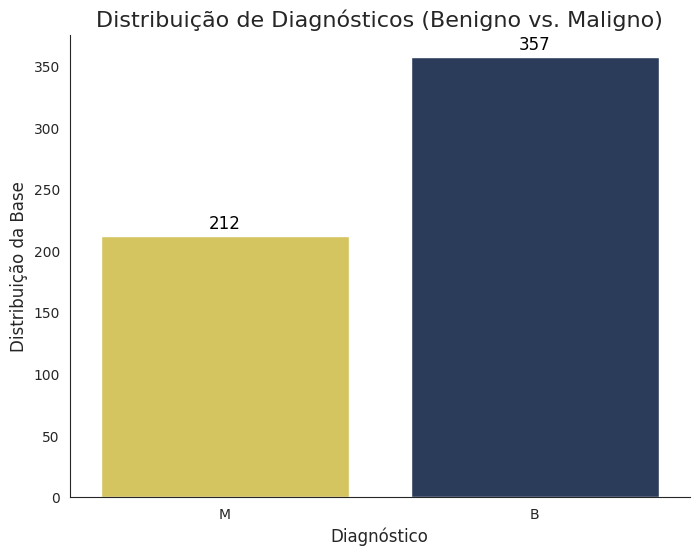



Quantidade de Benignos: 357 casos no datase
Quantidade de Malignos: 212 casos no dataset


In [ ]:
# Diagnósticos ('B' para Benigno e 'M' para Maligno)

# O estilo "white" mantém o fundo branco, mas sem as grades.
sns.set_style("white")

# Define o tamanho da figura para que o gráfico não fique apertado na visualização dos dados
plt.figure(figsize=(8, 6))

# Criamos um dicionário para mapear cada diagnóstico a uma cor específica
# Isso nos dá total controle sobre a aparência do gráfico
custom_palette = {
    "B": "#233a63",
    "M": "#e7d34d"
} # Aqui apresento o conceito de azul escuro (#233a63) para a categoria Benigno (B) e o amerelo sick (#e7d34d) para a categoria Maligno (M)

# Passamos nosso dicionário de cores para o argumento 'palette'.
ax = sns.countplot(x=Y, palette=custom_palette)

# Adiciona um título claro e informativo
ax.set_title("Distribuição de Diagnósticos (Benigno vs. Maligno)", fontsize=16)

# Melhora os nomes dos eixos para maior clareza
ax.set_xlabel("Diagnóstico", fontsize=12)
ax.set_ylabel("Distribuição da Base", fontsize=12)

# Este é o truque para deixar o gráfico mais elegante e informativo:
# Vamos iterar sobre cada barra (patch) no gráfico e adicionar o valor no topo dela.
for patch in ax.patches:
    # Pega a altura da barra (que é a contagem)
    height = patch.get_height()
    # Formata o texto que será exibido (a contagem como um número inteiro)
    label = f'{int(height)}'
    # Pega a posição x da barra para centralizar o texto
    x_pos = patch.get_x() + patch.get_width() / 2
    # Posição y (um pouco acima da barra para não ficar colado)
    y_pos = height + 3

    # Adiciona o texto ao gráfico na posição calculada
    ax.text(x=x_pos, y=y_pos, s=label, ha='center', va='bottom', fontsize=12, color='black')

# Para um visual ainda mais limpo, a função despine() remove as bordas de cima e da direita
sns.despine()

# Mostra o gráfico finalizado
plt.show()

# Para dar um espaço entre o gráfico e o texto
print("\n") # Arcáico, mas funciona... Gabiarras funcionais...

# Embora os valores já estejam no gráfico, podemos mantê-los no console para uma melhor compressão da base
B, M = Y.value_counts()
print(f'Quantidade de Benignos: {B} casos no datase')
print(f'Quantidade de Malignos: {M} casos no dataset')

### Vamos ver como os dados se comportam...

Para uma melhor compreensão dos dados podemos observar como eles se comportam.

> Após a execução a primeira tabela a seguir mostrará os seguintes dados estatísticos sobre os dados: **soma, média, desvio padrão, valor 25%, 50%(mediana) e 75%, máximo e mínimo...**

In [ ]:
# Mostra a soma, média, desvio padrão, min, max, valor dos 25%, 50% (mediana) e 75% do espaço amostral do dataset
X.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

> Mesmo conjunto, agora sendo exibido normalizado...

In [ ]:
# Criei uma instância da minha ferramenta de padronização
scaler_geral = StandardScaler()

# Usei a ferramenta para ver a média/desvio de cada coluna de X e 'transformar' os dados
# O resultado é um array numpy, então preciso colocá-lo de volta em um dataframe
X_scaled_array = scaler_geral.fit_transform(X)

# Criei um novo dataframe 'X_scaled' com os dados já padronizados,
# mantendo os mesmos nomes de colunas do dataframe original.
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# Mostrando as 10 primeiras linhas da versão normalizada
print("Visualizando as 10 primeiras linhas dos meus dados padronizados (normalizados):")

# Usei .head(10) no meu novo dataframe padronizado
X_scaled.head(10)

Visualizando as 10 primeiras linhas dos meus dados padronizados (normalizados):


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   
5    -0.476375     -0.835335       -0.387148  -0.505650         2.237421   
6     1.170908      0.160649        1.138125   1.095295        -0.123136   
7    -0.118517      0.358450       -0.072867  -0.218965         1.604049   
8    -0.320167      0.588830       -0.184080  -0.384207         2.201839   
9    -0.473535      1.105439       -0.329482  -0.509063         1.582699   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   
5          1.244335        0.866302             0.824656       1.005402   
6          0.088295        0.300072             0.646935      -0.064325   
7          1.140102        0.061026             0.281950       1.403355   
8          1.684010        1.219096             1.150692       1.965600   
9          2.563358        1.738872             0.941760       0.797298   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   
5                1.890005  ...     -0.165498      -0.313836        -0.115009   
6               -0.762332  ...      1.368983       0.322883         1.368325   
7                1.660353  ...      0.163763       0.401048         0.099449   
8                1.572462  ...     -0.161357       0.822813        -0.031609   
9                2.783096  ...     -0.244190       2.443109        -0.286278   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   
5   -0.244320          2.048513           1.721616         1.263243   
6    1.275220          0.518640           0.021215         0.509552   
7    0.028859          1.447961           0.724786        -0.021054   
8   -0.248363          1.662757           1.818310         1.280035   
9   -0.297409          2.320295           5.112877         3.995433   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  
5              0.905888        1.754069                 2.241802  
6              1.196716        0.262476                -0.014730  
7              0.624196        0.477640                 1.726435  
8              1.391616        2.389857                 1.288650  
9      

### Explicação dos atributos:

Os atributos são divididos em três grupos: Mean, SE e Worst.

> Mean: média de todas as células;

> SE: *Standard Error* (erro padrão de todas as células);

> Worst: média dos três piores valores medidos das células. Na verdade, é considerado "pior" porque são medidas indicativas de células não saudáveis; na realidade o "pior" significa os maiores valores medidos para raio, perímetro, textura etc.

Cada grupo tem 10 atributos:

- `radius` (raio da célula)
- `texture` (textura da célula - medida pelo desvio padrão de escalas de cinza, que ajudam a indicar se a célula é saudável ou não)
- `perimeter` (perímetro)
- `area` (área)
- `smoothness` (variação local em comprimentos de raio)
- `compactness` (campactude = perimetro²/area - 1)
- `concavity` (gravidade das porções côncavas das células)
- `concave points` (número de porções côncavas no contorno da célula),
- `symmetry` (simetria)
- `fractal_dimension` (dimensão fractal).






### Mapa de calor para os dados tratados

No mapa de calor é feita uma regressão linear de todos os atributos combinados 2 a 2, e o valor que aparece nas células do mapa de calor são os coeficientes angulares de um atributo em relação ao outro, resultante da regressão linear. Para exemplificar, o valor que aparece nas células da diagonal principal, é o coeficiente angular de um atributo em relação a ele mesmo, logo o valor é 1.

Se o coefiente angular é positivo, significa que quando o atributo do eixo horizontal cresce, o atributo do eixo vertical também cresce com taxa de variação igual ao valor do coeficiente angular.

Se o coeficiente angular é negativo,  significa que quando o atributo do eixo horizontal cresce, o do eixo vertical  decresce com taxa de variação igual ao módulo do coeficiente angular.

Por fim, caso o coeficiente seja zero, significa que as duas variáveis não dependem linearmente uma da outra. Nesses casos pode existir uma dependência não-linear, que seria necessário investigá-la por outros meios.

### Como funciona

Para cada par `(Xᵢ, Xⱼ)`, ajusta-se: `Xⱼ = m * Xᵢ + b`

Em seguida, registra-se o coeficiente angular **m** em uma matriz quadrada.  
Note que na diagonal principal (quando i = j), sempre teremos **m = 1**.

---

### Interpretação dos dados

- **m > 0**: quando `Xᵢ` cresce, `Xⱼ` cresce proporcionalmente a *m*.  
  *Exemplo:* se `m = 0.85` em `area_mean` vs `perimeter_mean`, um aumento de 1 em `perimeter_mean` tende a gerar **+0.85** em `area_mean`.

- **m < 0**: quando `Xᵢ` cresce, `Xⱼ` decresce proporcionalmente a |m|.  
  *Exemplo:* se `m = -0.8` em `concavity_mean` vs `texture_mean`, um aumento de 1 em `texture_mean` tende a gerar **-0.8** em `concavity_mean`.

- **m ≈ 0**: pouca ou nenhuma dependência linear.  
  Relações não-lineares podem existir e devem ser exploradas com métodos alternativos (*Spearman*, *análise de clusters*, etc.).

---

### Exemplo prático


|               | `perimeter_mean` | `area_mean` |
|---------------|------------------|-------------|
| `perimeter_mean` | 1.00             | 0.85        |
| `area_mean`      | 0.85             | 1.00        |



A célula **(`area_mean`, `perimeter_mean`) = 0.85** indica que, em média, um aumento de 1 em `perimeter_mean` corresponde a **+0.85** em `area_mean`.



> **Observação:** valores próximos a **+1** (cores quentes) sinalizam relação linear positiva forte; valores próximos a **–1** (cores frias) indicam relação inversa forte.

---

### Importância para o MVP 2 de Machine Learning

> **Detecção de multicolinearidade:** coeficientes muito próximos a ±1 indicam redundância entre variáveis, prejudicial a modelos lineares.

> **Seleção de atributos:** remover variáveis altamente correlacionadas simplifica o modelo sem perda significativa de informação.

> **Contexto biológico:** reforça a conexão entre características celulares (ex.: perímetro e área), alinhada ao pleomorfismo em células cancerígenas.




<Axes: >

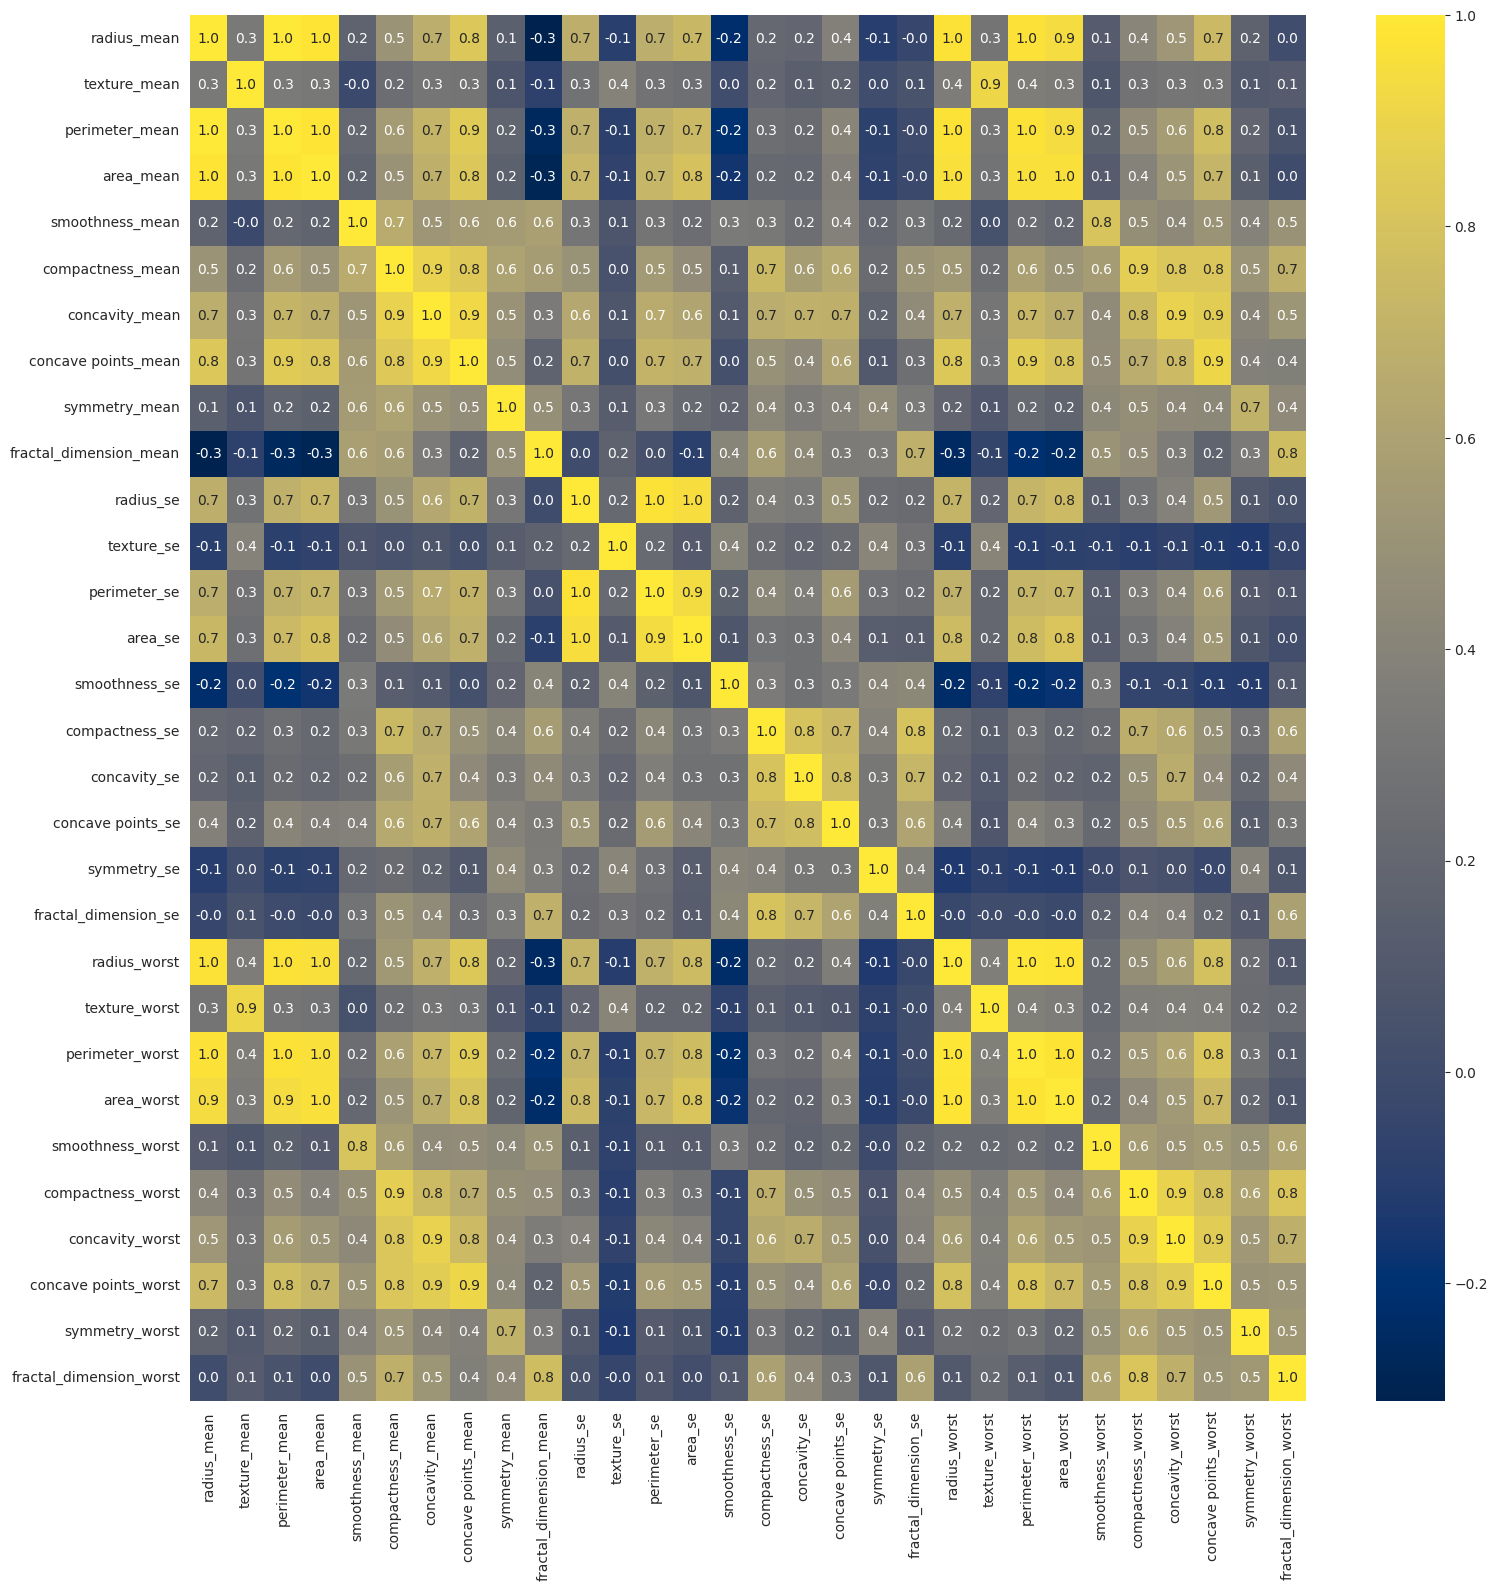

In [ ]:
# Mostrar mapa de calor
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, fmt= '.1f', cmap ='cividis') # Usei o padrão de cores 'cividis'

### Fun-fact

Paletas perceptualmente uniformes, como **viridis** e **cividis**, mantêm um gradiente de luminância quase linear, evitam artefatos visuais e permanecem legíveis para pessoas com deficiência de visão de cores. Portanto, são recomendadas para gráficos voltados a públicos amplos ou heterogêneos.

---

### Por que revisar a paleta?

| Motivo                        | Evidência                                                                 | Impacto                                                                |
|------------------------------|---------------------------------------------------------------------------|------------------------------------------------------------------------|
| **Acessibilidade**           | Prevalência de CVD atinge ~8% dos homens e 0,4% das mulheres (Birch, 2012). | Evita exclusão do público e interpretações errôneas.                  |
| **Uniformidade perceptual**  | *viridis*/*cividis* apresentam curva de luminância monotônica (Moreland, 2009). | Reduz artefatos e realça padrões reais.                               |
| **Boas práticas de visualização** | Diretrizes do Matplotlib desencorajam paletas arco-íris (Matplotlib Docs). | Aumenta rigor científico e facilita revisão.                          |
| **Reprodutibilidade em P&B** | Paletas uniformes preservam contraste em escala de cinza.                 | Garante legibilidade em relatórios impressos e PDFs.                  |

---

### Ferramentas para teste de acessibilidade dadas em aula neste módulo


- **Coblis – Color Blindness Simulator**  
  https://www.color-blindness.com/coblis-color-blindness-simulator/

- **colorblindr (pacote R)**  
  https://github.com/clauswilke/colorblindr

- **viscm (Python)**  
  https://github.com/matplotlib/viscm

- **Diagnóstico de colormap no Matplotlib**  
  https://matplotlib.org/stable/tutorials/colors/colormaps.html


### Outra visão dos dados

Para melhor visualizar o mapa de calor, foram separados os grupos `Mean`, `SE` e `Worst`.


A ideia do heatmap aqui é entender como os atributos se relacionam. Caso tenham grande correlação, é um indicativo de multicolinearidade, que pode levar a resultados distorcidos. Existem várias maneiras de lidar com esse problema, como por exemplo o uso de PCA (*Principal Component Analysis*). Contudo, a abordagem utilizada será mais simples, que é a de simplesmente escolher um dos atributos para manter na base e eliminar os outros que tenham alta correlação com ele.

> **Observação:** Algoritmos que usam ávores de decisão evitam problemas de multicolinearidade naturalmente em sua implementação.

A decisão de implementação foi de deletar os atributos com correlação maior ou igual a 0.9.

<Axes: >

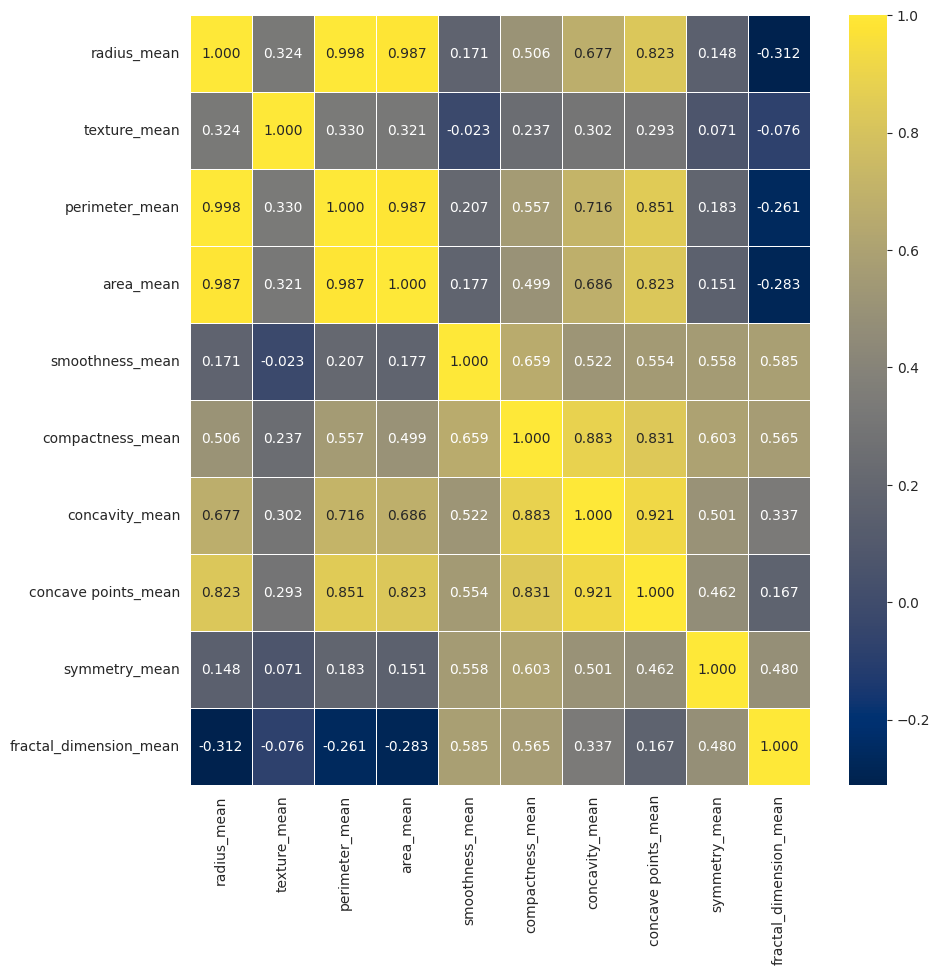

In [ ]:
droplist_se_worst = ['radius_se', 	'texture_se',	'perimeter_se',	'area_se',	'smoothness_se',	'compactness_se',	'concavity_se',	'concave points_se',	'symmetry_se',	'fractal_dimension_se', 'radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst',	'compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst']

somente_mean = X.drop(droplist_se_worst, axis = 1)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(somente_mean.corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='cividis')

- Os atributos `radius_mean`, `perimeter_mean` e `area_mean possuem` correlação acima de 0.9, então iremos remover os atributos `radius_mean` e `perimeter_mean` (escolha arbitrária)

- Os atributos `concavity_mean` e `concave points_mean` possuem correlação acima de 0.9, então iremos remover o atributo `concavity_mean` (escolha arbitrária)

> Portanto, nesse primeiro grupo, os atributos que continuarão serão: `area_mean`, `texture_mean`, `smoothness_mean`, `compactness_mean`, `concave points_mean`, `symmetry_mean` e `fractal_dimension_mean`



<Axes: >

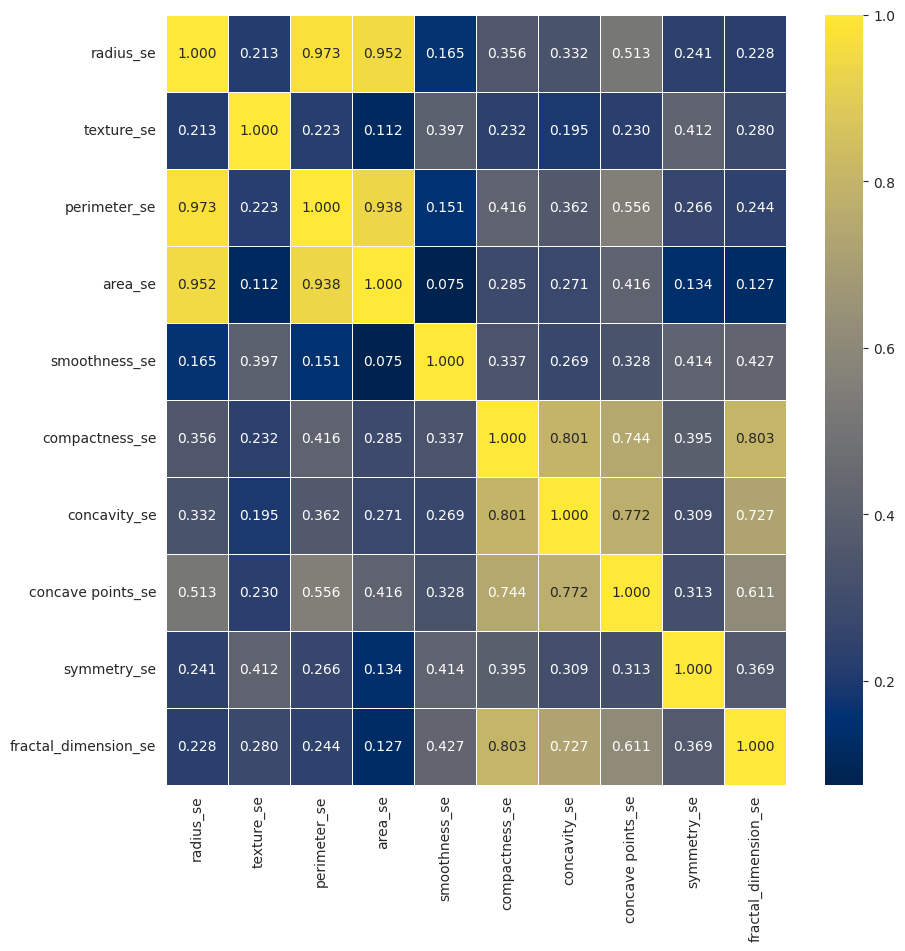

In [ ]:
# Define uma lista com os nomes das 20 colunas que serão removidas do dataset
droplist_mean_worst = ['radius_mean', 'texture_mean',	'perimeter_mean',	'area_mean', 	'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean', 'radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst',	'compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst']

# Cria um novo dataframe 'somente_se' removendo as colunas da lista acima...
# O parâmetro 'axis=1' indica que a remoção é de colunas, não de linhas...
somente_se = X.drop(droplist_mean_worst, axis = 1)

# Gera e exibe um mapa de calor (heatmap) para visualizar a matriz de correlação
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(somente_se.corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='cividis')

- Os atributos `radius_se`, `perimeter_se` e  `area_se` possuem correlação acima de 0.9, então iremos remover os atributos perímetro e raio (escolha arbitrária)

> Portanto, nesse segundo grupo, os atributos que continuarão serão: `area_se`, `texture_se`, `smoothness_se`, `compactness_se`, `concavity_se`, `concave points_se`, `symmetry_se` e `fractal_dimension_se`

<Axes: >

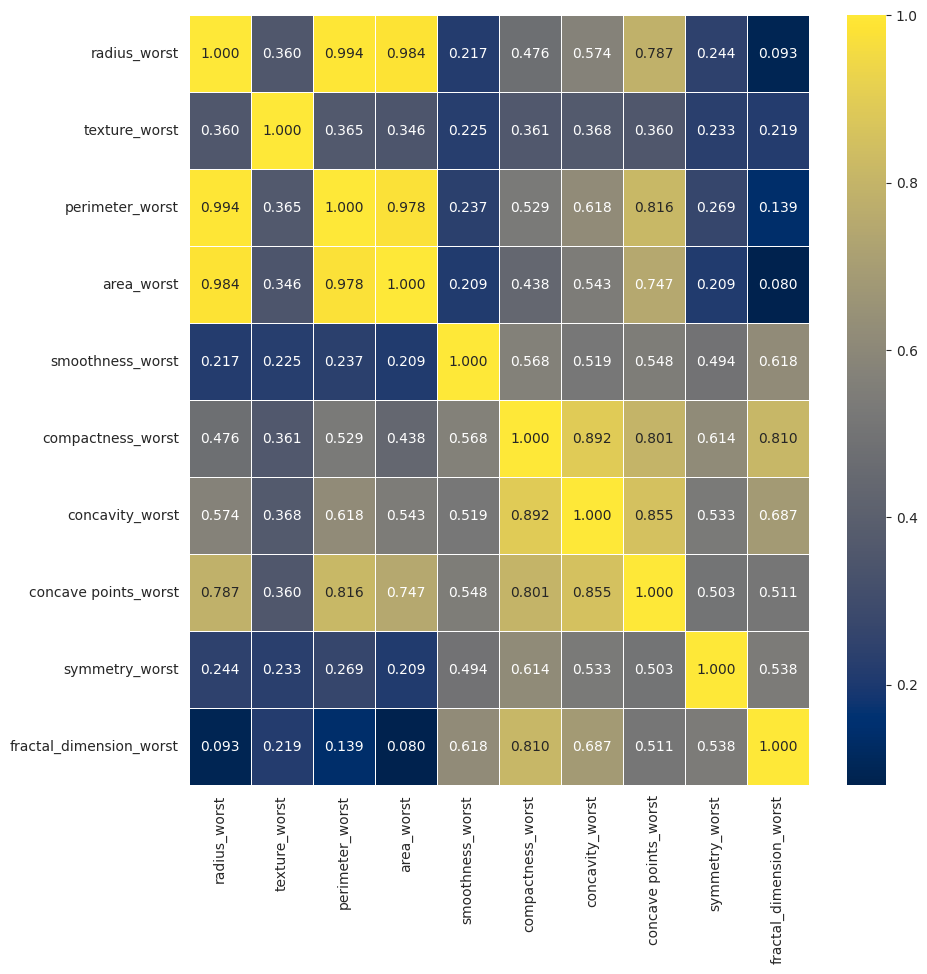

In [ ]:
# Define uma lista com os nomes das colunas que serão removidas do dataset
droplist_mean_se = ['radius_mean', 'texture_mean',	'perimeter_mean',	'area_mean', 	'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean', 'radius_se', 	'texture_se',	'perimeter_se',	'area_se',	'smoothness_se',	'compactness_se',	'concavity_se',	'concave points_se',	'symmetry_se',	'fractal_dimension_se']

# Cria um novo dataframe 'somente_worst' removendo as colunas da lista acima...
# O parâmetro 'axis=1' indica que a remoção é de colunas, não de linhas...
somente_worst = X.drop(droplist_mean_se, axis = 1)

# Gera e exibe um mapa de calor (heatmap) para visualizar a matriz de correlação
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(somente_worst.corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='cividis')

- Os atributos `radius_worst`, `perimeter_worst` e  `area_worst` possuem correlação acima de 0.9, então iremos remover os atributos perímetro e raio (escolha arbitrária)

> Portanto, nesse primeiro terceiro, os atributos que continuarão serão: `area_worst`, `texture_worst`, `smoothness_worst`, `compactness_worst`, `concavity_worst`, `concave points_worst`, `symmetry_worst` e `fractal_dimension_worst`

### **Plotagem de Violino**

A plotagem de violino nos mostra a distribuição dos dados de acordo com cada classe e cada atributo. Para cada atributo à esquerda do eixo é apresentada a distribuição dos dados para a classe (M) Maligno,  e à direita a distribuição para a classe (B) Benigno.

> Através da observação da plotagem de violino podemos inferir que os atributos `area_mean`, `concave points_mean`, `area_se`, `area_worst`, `concavity_worst` e `concave points_worst` são bons atributos para a separação das classes, visto que a distribuição dos dados das classes é bem distinto...

--- Informações do Gráfico ---


Rótulos aplicados ao eixo X:
['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']




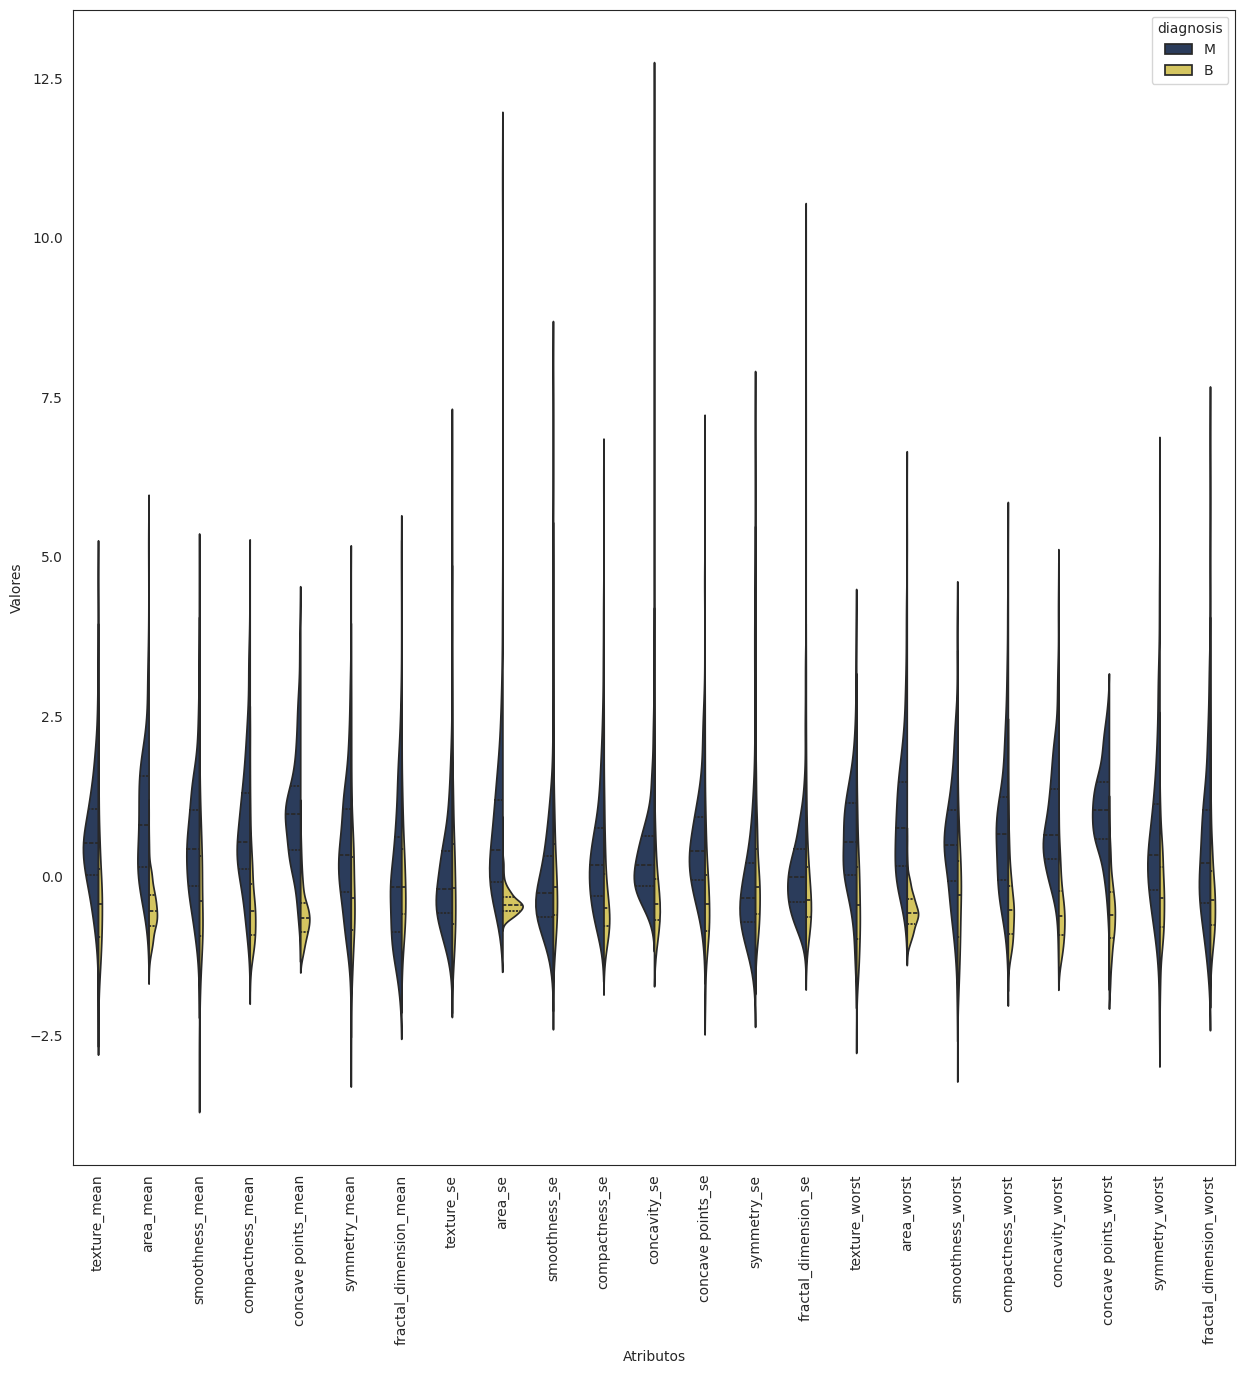

In [ ]:
# Importa a ferramenta de padronização que usaremos
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define a lista de colunas que serão removidas para a análise...
droplist_final = ['radius_mean', 'perimeter_mean',   'concavity_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst']

# Armazena a variável alvo (diagnóstico) em 'data_dia' (embora Y seja usado depois)
data_dia = Y
# Cria o dataframe de trabalho 'data' removendo as colunas indesejadas de X
data = X.drop(droplist_final, axis = 1)

# Padroniza os dados com StandardScaler
scaler_plot = StandardScaler()
features_array = scaler_plot.fit_transform(data)
# Recria o dataframe padronizado mantendo colunas e índices
data_n_2 = pd.DataFrame(features_array, columns=data.columns, index=data.index)

# Junta a variável alvo (Y) com os dados já padronizados
data = pd.concat([Y,data_n_2],axis=1)

# Transforma o formato do DataFrame de 'largo' para 'longo', ideal para o violinplot
data = pd.melt(data,id_vars="diagnosis",
                    var_name="Atributos",
                    value_name='Valores')

# Configura o tamanho da figura que será gerada
plt.figure(figsize=(15,15))
# Cria o gráfico de violino para comparar a distribuição dos valores por diagnóstico
sns.violinplot(x="Atributos", y="Valores", hue="diagnosis", data=data,split=True, inner="quart", palette={'M': '#233a63', 'B': '#e7d34d'}) # Aqui estamos de volta com o conceito de azul escuro (#233a63) para a categoria Benigno (B) e o amerelo sick (#e7d34d) para a categoria Maligno (M)

# Captura a saída da função plt.xticks em uma variável
# A saída é uma tupla: (lista de ticks, lista de objetos de texto dos rótulos)
ticks_info = plt.xticks(rotation=90)

# Extrai apenas a lista de objetos de texto (que está na segunda posição, índice 1)
lista_de_rotulos = ticks_info[1]

# Usa uma "list comprehension" para pegar o texto de cada objeto de rótulo
textos_dos_rotulos = [rotulo.get_text() for rotulo in lista_de_rotulos]

# Imprime a informação de forma organizada
print("--- Informações do Gráfico ---")
print('\n') # Mais uma gambiarra, não me julguem
print("Rótulos aplicados ao eixo X:")
print(textos_dos_rotulos)
print('\n') # Mais uma gambiarra, sorry

# Exibe o gráfico limpo
plt.show()

### **Gráfico de pares de atributos**

Os gráficos abaixo mostram as correlações entre os atributos (*mean, se* e *worst*) e as classes.

Observando os gráficos da diagonal principal (histogramas referente à distribuição dos dados de acordo com o atributo em si) podemos inferir que os `atributos area_mean`, `concave points_mean`, `area_se`, `concave points_worst` e `area_worst` são bons atributos para a separação das classes, visto que a distribuição dos dados das classes é bem distinto.


Correlação entre classes maligno e benigno, e atributos 'mean'

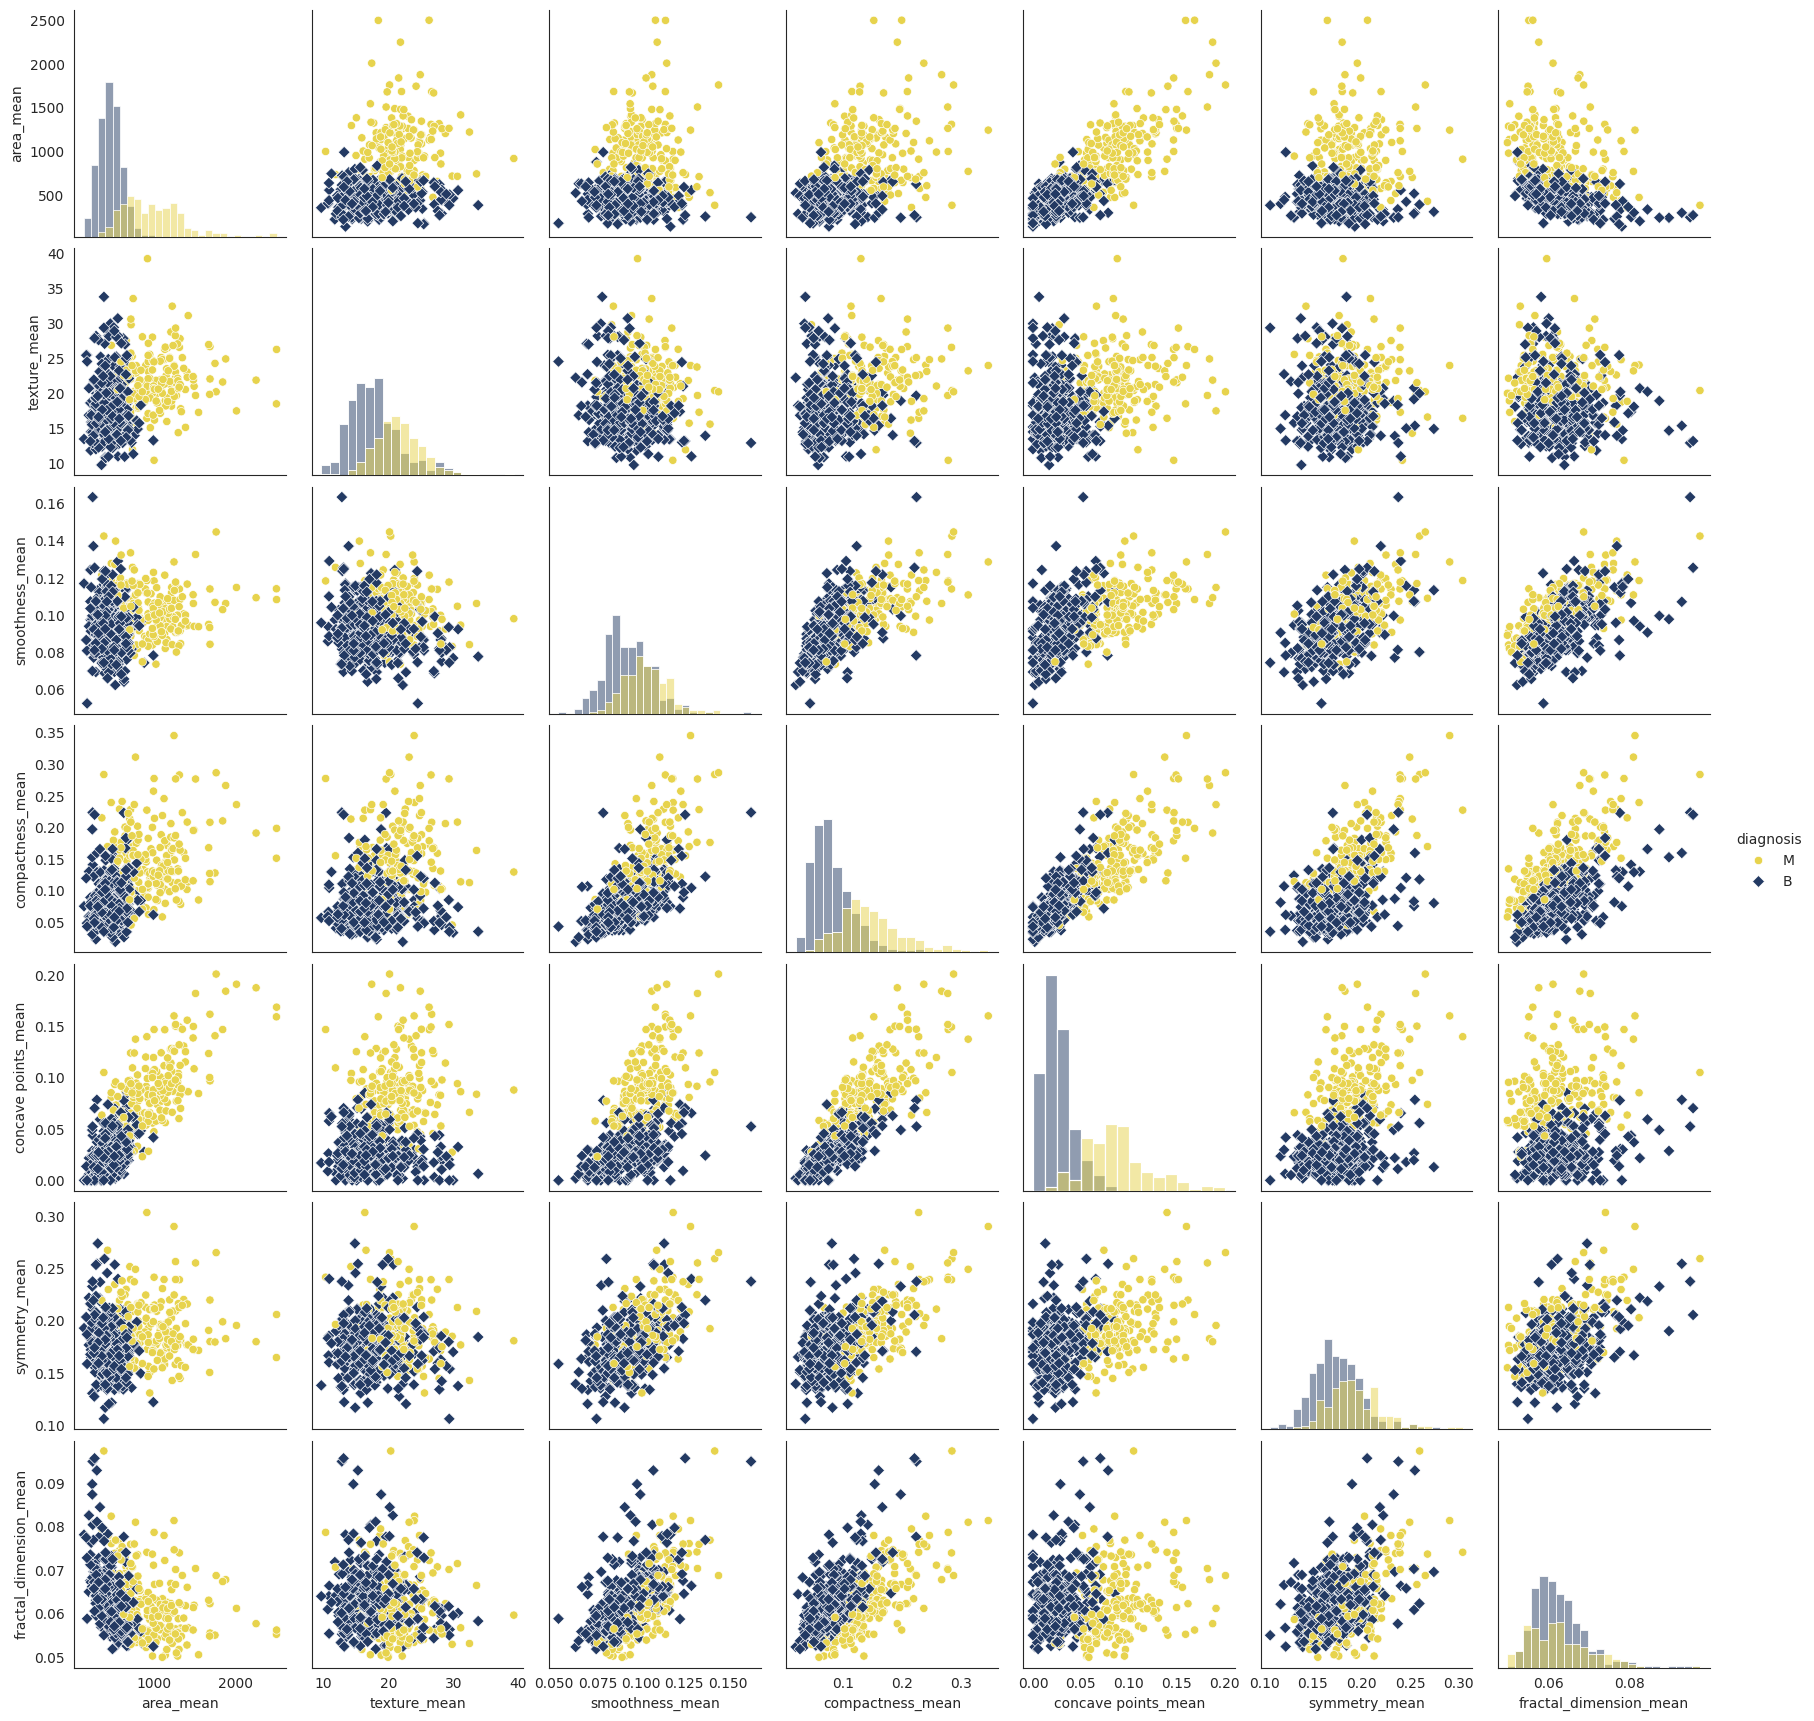

In [ ]:
# Mostrar correlação entre classes e atributos 'mean'
# Dicionário de cores
cores_diagnostico = {'M': '#e7d34d', 'B': '#233a63'} # Aqui estamos de volta com o conceito de azul escuro (#233a63) para a categoria Benigno (B) e o amerelo sick (#e7d34d) para a categoria Maligno (M)

# Mostrar correlação entre classes e atributos 'mean'
sns.pairplot(
    dados,
    kind="scatter",
    diag_kind="hist",
    hue="diagnosis",
    markers=["o", "D"],
    vars=["area_mean", "texture_mean", "smoothness_mean", "compactness_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"],
    palette=cores_diagnostico  # Defino as cores aqui
)
plt.show() # Mostra do gráfico

Correlação entre classes maligno e benigno, e atributos 'se'

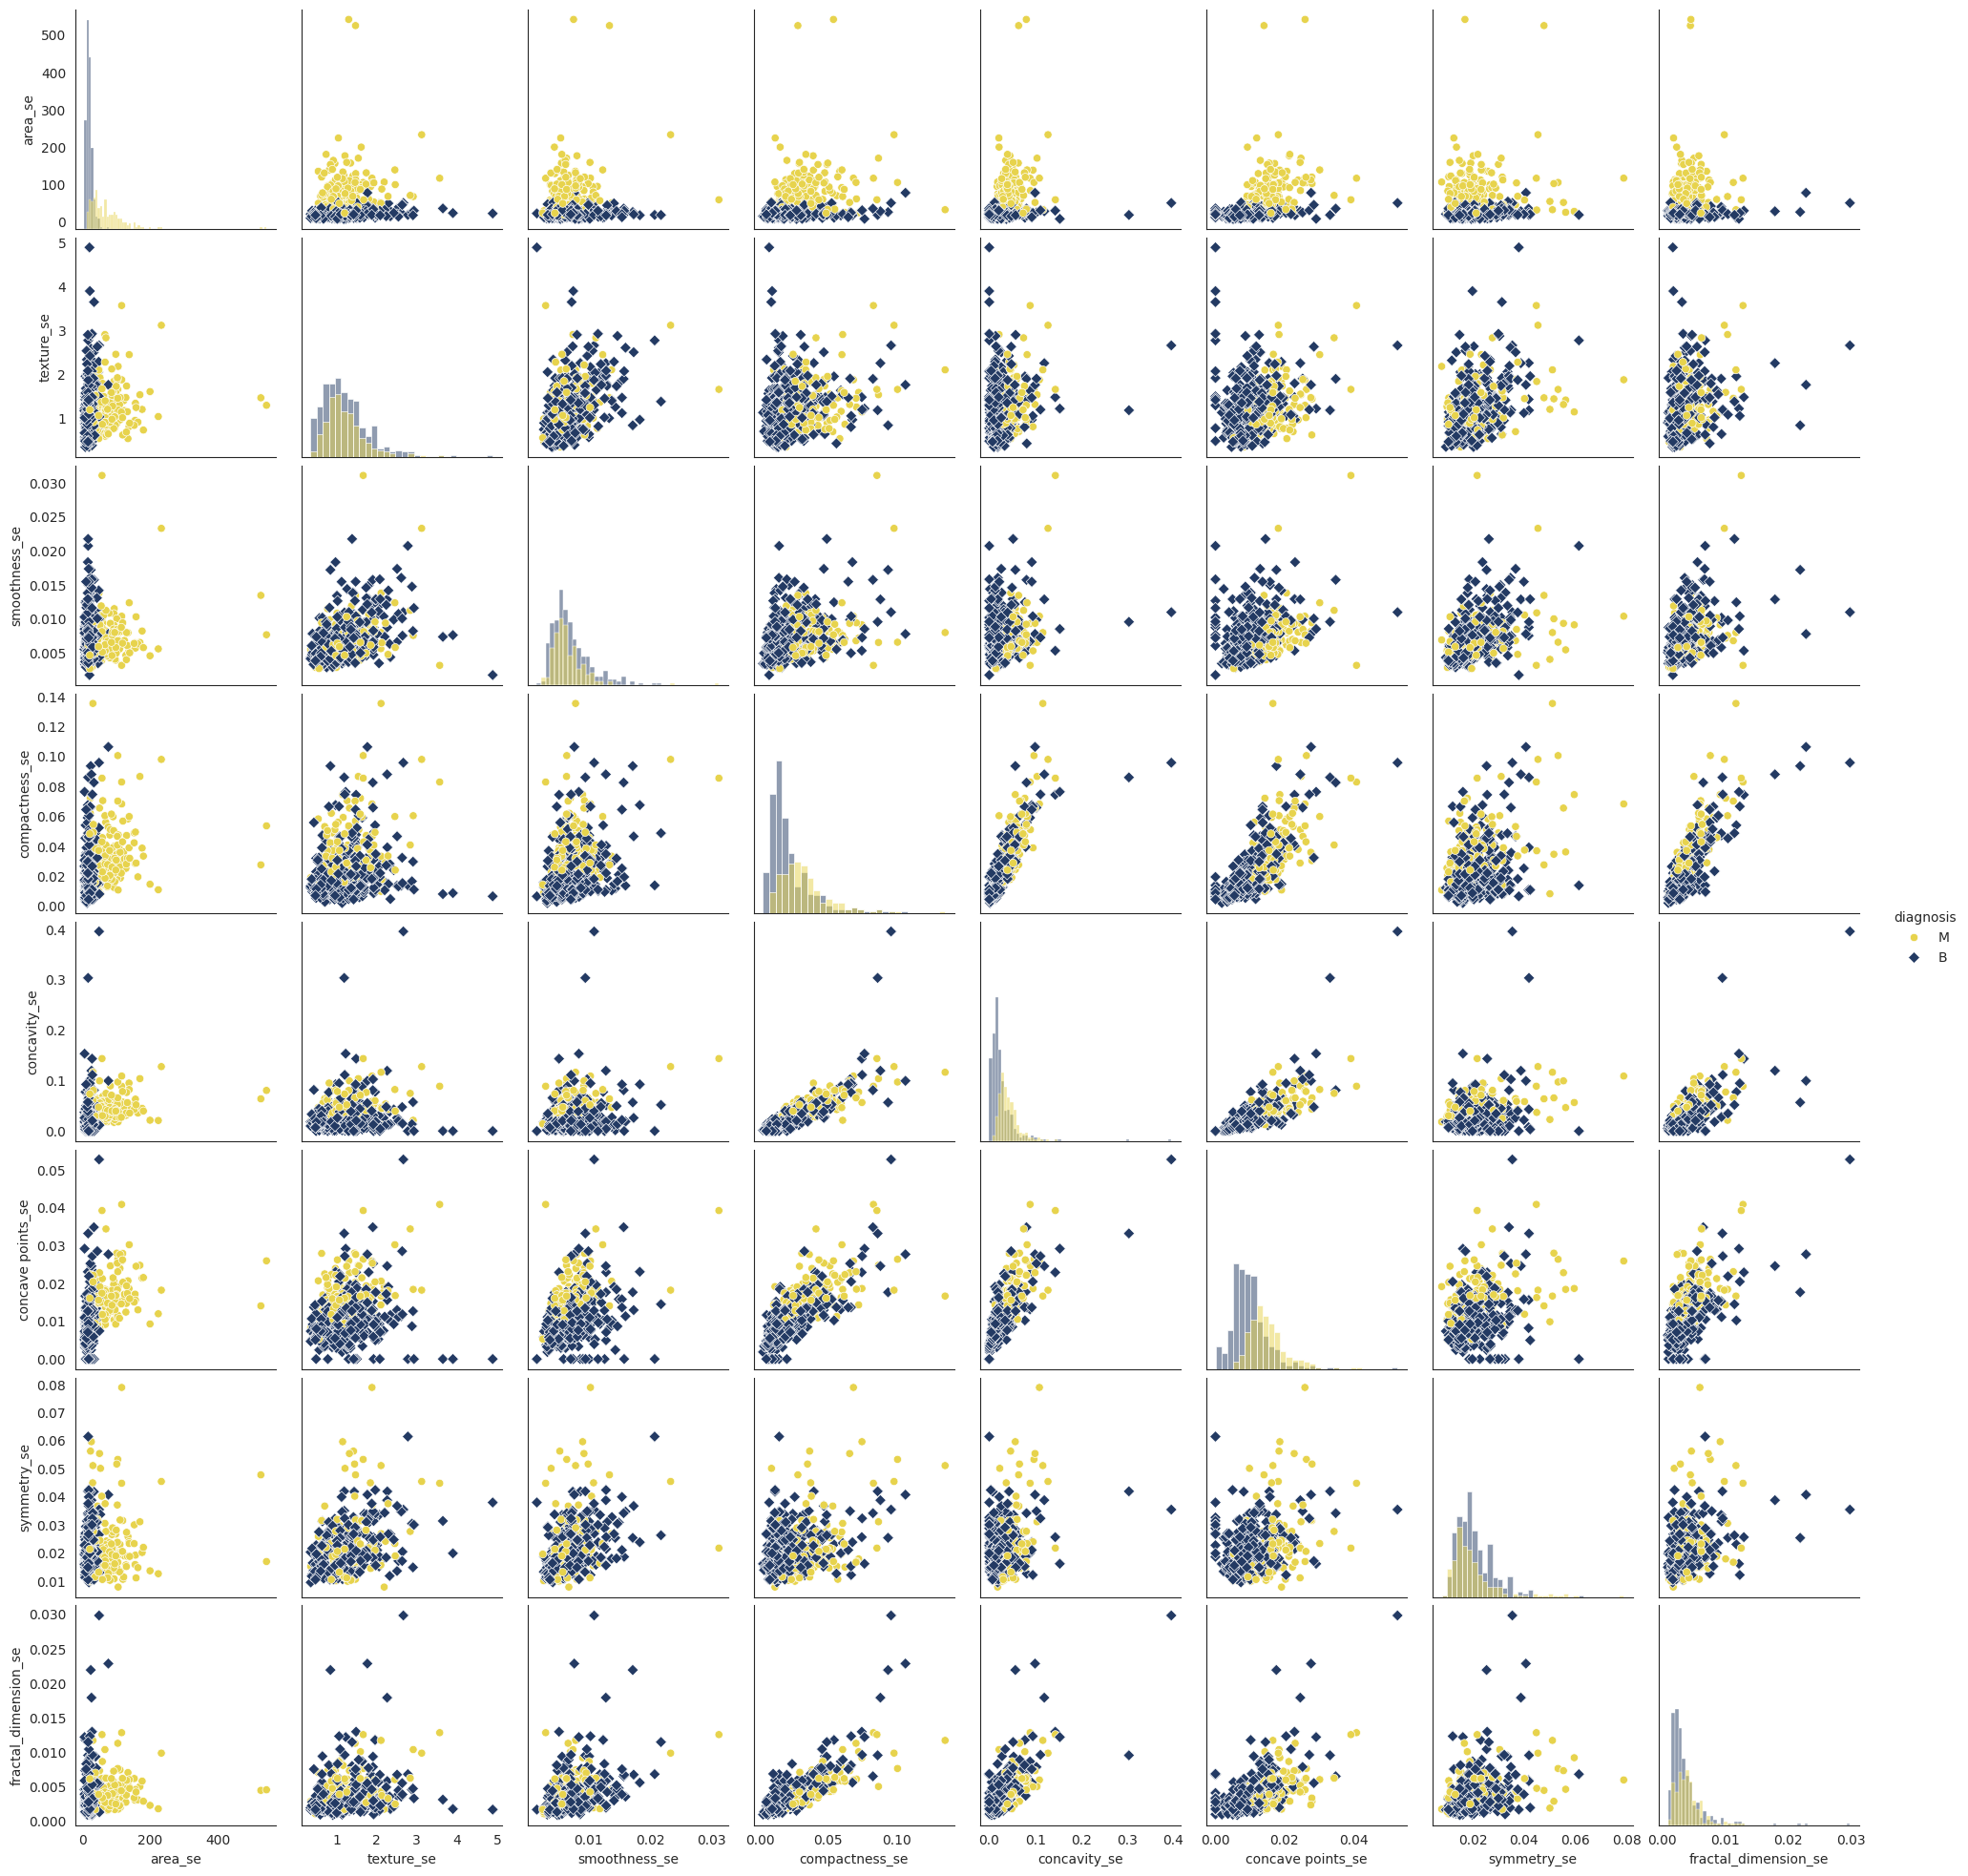

In [ ]:
# Mostrar correlação entre classes e atributos 'se'
# Dicionário de cores
cores_diagnostico = {'M': '#e7d34d', 'B': '#233a63'} # Aqui estamos de volta (sim, mais uma vez) com o conceito de azul escuro (#233a63) para a categoria Benigno (B) e o amerelo sick (#e7d34d) para a categoria Maligno (M)

sns.pairplot(dados, kind="scatter", diag_kind="hist", hue="diagnosis" ,  markers=["o", "D"], vars=["area_se", "texture_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se"],     palette=cores_diagnostico) # Defino as cores aqui
plt.show() # Mostra o gráfico

Correlação entre classes maligno e benigno, e atributos 'worst'

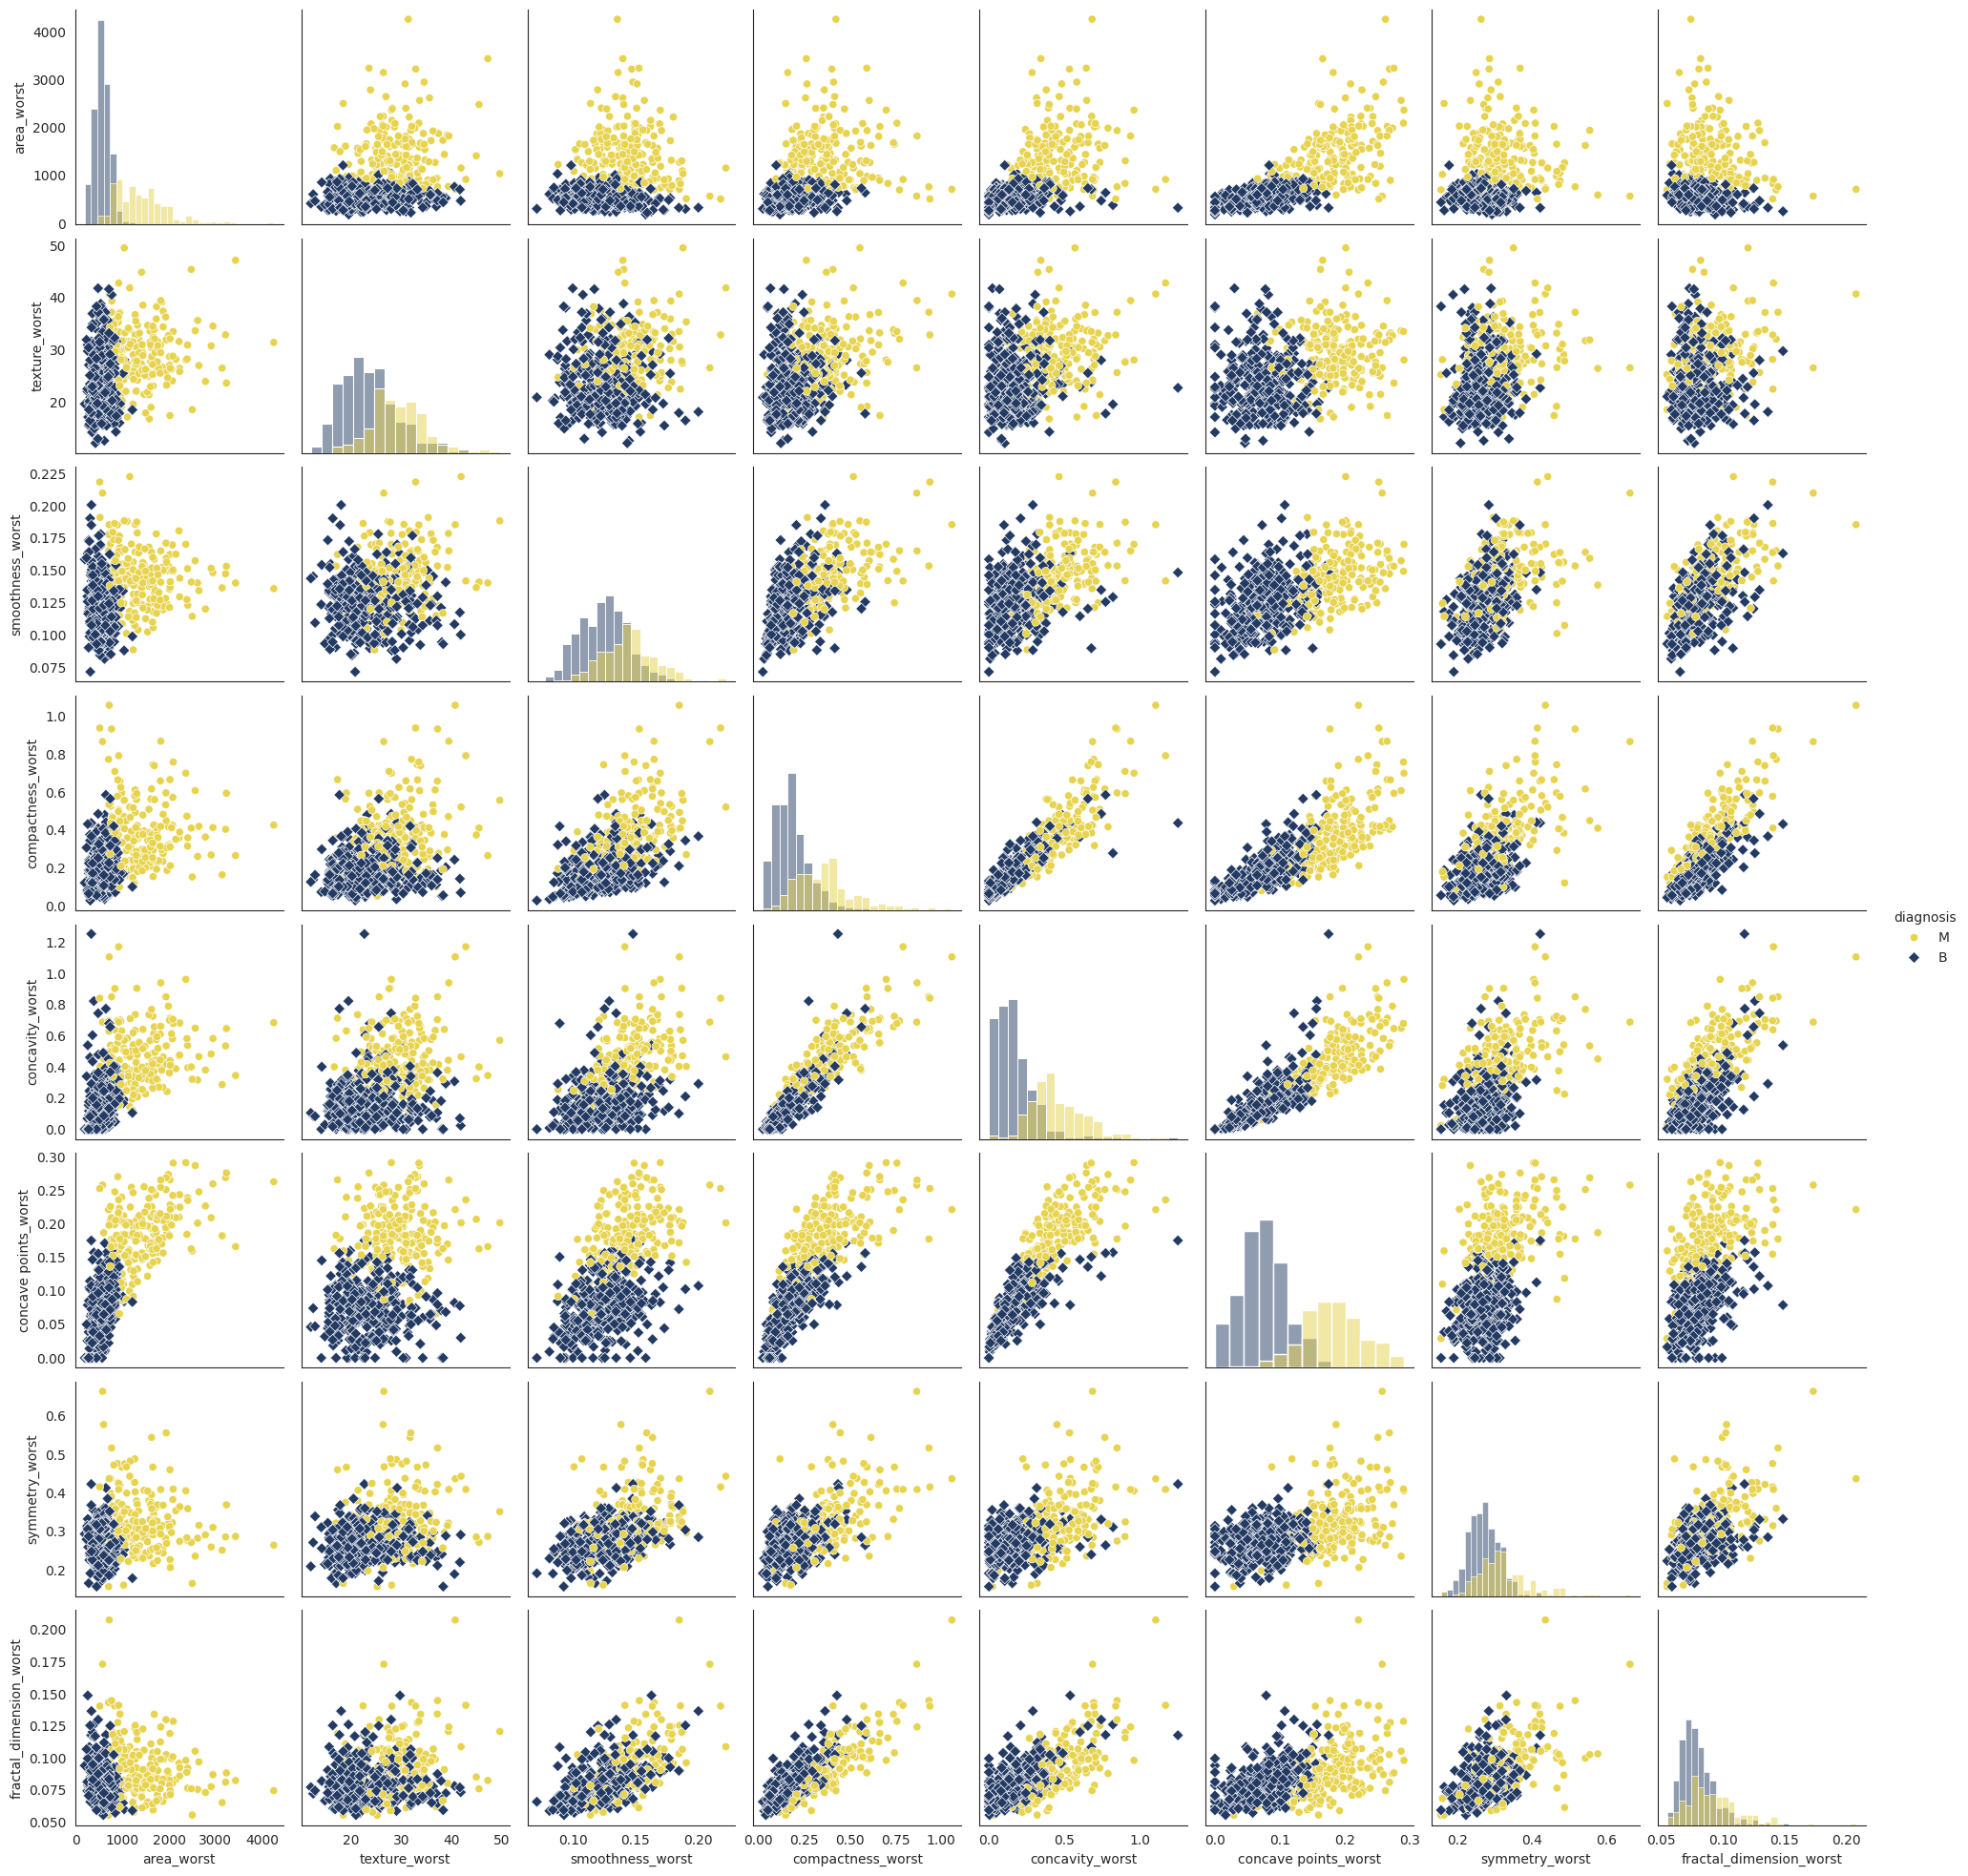

In [ ]:
# Mostrar correlação entre classes e atributos 'worst'
# Dicionário de cores
cores_diagnostico = {'M': '#e7d34d', 'B': '#233a63'} # Aqui estamos de volta (sim, mais uma vez) com o conceito de azul escuro  (#233a63) para a categoria Benigno (B) e o amerelo sick (#e7d34d) para a categoria Maligno (M)

sns.pairplot(dados, kind="scatter", diag_kind="hist", hue="diagnosis" ,  markers=["o", "D"], vars=["area_worst", "texture_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst" , "fractal_dimension_worst"],  palette=cores_diagnostico) # Defino as cores aqui
plt.show() # Mostra o gráfico

# Transformação

A transformação é a etapa de armazenamento dos dados de forma a facilitar o uso das técnicas de mineração e exploração de dados.

Nessa etapa a base de dados será repartida em duas partes, sempre garantindo que os dados estejam já previamente normalizados nas etapas anteriores:

- Treino: dados que serão usados para treinar o modelo
- Teste: dados que serão usados para calcular a qualidade do modelo gerado

In [ ]:
# Seleção de features
# Usamos a mesma lista de remoção que você definiu com base nas análises.
droplist_final = ['radius_mean',    'perimeter_mean',   'concavity_mean',   'radius_se',    'perimeter_se', 'radius_worst', 'perimeter_worst']

# Aqui é criado o nosso dataframe final de features (X_final) que será usado no modelo
X_final = X.drop(droplist_final, axis = 1) # A nossa variável alvo 'Y' continua a mesma

print(f"Seleção de Features:")
print('\n') # Pulando linha (ninguém viu que eu fiz isso aqui... rs)
print(f"Número de features selecionadas para o modelo: {X_final.shape[1]}")

# Separação dos dados em treino e teste (75/25)
# Agora usamos 'X_final' para a divisão, garantindo que o modelo use apenas as features selecionadas.
x_train, x_test, y_train, y_test = train_test_split(X_final, Y, test_size=0.25, random_state=10) # random_state=10 para garantiar a reprodutibilidade

print(f"Divisão dos Dados")
print('\n') # Pulando linha (ninguém viu que eu fiz isso aqui... rs)
print('Quantidade de registros para treino: ', x_train.shape[0])
print('Quantidade de registros para teste: ',x_test.shape[0])
print('\n') # Pulando linha (ninguém viu que eu fiz isso aqui... rs)

# Padronização dos dados
# A padronização é feita depois da divisão para evitar vazamento de dados do teste no treino

# Aqui é criado a nossa padronização
scaler = StandardScaler()

# Treinamos o scaler apenas com os dados de treino
# O scaler pega a média e o desvio padrão somente do conjunto de treino
scaler.fit(x_train)

# Usamos o scaler já treinado para transformar o treino e o teste
# Isso garante que ambos os conjuntos sejam transformados com a mesma regra
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Para facilitar a visualização, dá para colocar os dados escalados de volta em dataframes
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)


# Visualização dos conjuntos finais
# Exibimos o início dos dataframes que realmente serão usados no modelo
print("Base de Treino Padronizada")
print('\n') # Pulando linha (ninguém viu que eu fiz isso aqui... rs)
display(x_train_scaled_df.head())
print('\n') # Pulando linha (ninguém viu que eu fiz isso aqui... rs)
print("Base de Teste Padronizada")
print('\n') # Pulando linha (ninguém viu que eu fiz isso aqui... rs)
display(x_test_scaled_df.head())

Seleção de Features:


Número de features selecionadas para o modelo: 23
Divisão dos Dados


Quantidade de registros para treino:  426
Quantidade de registros para teste:  143


Base de Treino Padronizada




texture_mean  area_mean  smoothness_mean  compactness_mean  \
0     -0.306249  -0.597596        -1.433404         -1.284871   
1     -1.020180  -0.968298         1.175843         -0.487793   
2      1.830863   1.730002         0.219761          0.051176   
3     -1.490673  -1.143006         4.743313          2.251790   
4      0.342141  -0.213902        -0.081333         -0.082658   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0            -1.129100      -1.614368               -0.310818   -0.578319   
1            -0.943053       3.484078                0.951294    0.406655   
2             1.104535       0.003948               -1.017033   -0.349734   
3             0.065594       2.116751                4.556112   -0.238500   
4            -0.668361      -0.722796                0.565570   -0.323779   

    area_se  smoothness_se  ...  symmetry_se  fractal_dimension_se  \
0 -0.505013      -0.767039  ...    -0.746884             -0.810516   
1 -0.142444       0.119425  ...     2.747471              0.839829   
2  0.221562      -0.667093  ...    -0.983528             -0.756658   
3 -0.441948       0.841647  ...     0.636968              2.607718   
4 -0.378679      -0.267627  ...    -0.716017             -0.085591   

   texture_worst  area_worst  smoothness_worst  compactness_worst  \
0      -0.556211   -0.635685         -1.457393          -1.189860   
1      -1.354220   -0.904694         -0.245684          -1.028954   
2       2.255111    1.659238          0.896652           0.243734   
3      -1.532110   -1.023559          2.654092           0.566066   
4      -0.140581   -0.348602         -0.296558          -0.346340   

   concavity_worst  concave points_worst  symmetry_worst  \
0        -1.295223             -1.346348       -1.237317   
1        -1.227251             -1.379741        1.129954   
2         0.513088              0.834792        0.436511   
3        -0.310006             -0.199303        0.243508   
4        -0.661855             -0.723275       -1.104094   

   fractal_dimension_worst  
0                -0.763627  
1                -0.213543  
2                -0.225295  
3                 2.304646  
4                 0.050587  

[5 rows x 23 columns]



Base de Teste Padronizada




texture_mean  area_mean  smoothness_mean  compactness_mean  \
0     -1.720067   0.206559         2.053441          0.944040   
1      0.632395  -1.100711        -0.322494         -0.957360   
2     -0.741630  -0.229659        -0.991752         -0.810333   
3      0.948397   0.492671         0.035680          0.833149   
4      0.508335  -0.779215         0.348190         -0.886045   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0             1.521282       0.573356                1.105867   -1.044388   
1            -0.945089      -0.453076                0.406743    1.218660   
2            -0.754409       0.221222               -0.879477   -1.325624   
3             0.961970       1.356292               -0.100938   -0.370127   
4            -0.997533      -0.741526               -0.205878    0.846027   

    area_se  smoothness_se  ...  symmetry_se  fractal_dimension_se  \
0  0.063388      -0.555688  ...    -0.327613              0.138098   
1 -0.486730       1.209920  ...     2.202161              0.316970   
2 -0.566023      -0.925871  ...    -0.133410             -0.644617   
3  0.081054      -0.478660  ...     1.479369              0.105468   
4 -0.463518      -0.073464  ...     0.832457             -0.690613   

   texture_worst  area_worst  smoothness_worst  compactness_worst  \
0      -1.422384    0.369799          0.938275           0.658346   
1      -0.090705   -1.031205         -1.041157          -1.130852   
2      -0.895365   -0.379882         -1.031908          -0.307998   
3       0.903482    0.479280          0.401794           1.361496   
4       0.552690   -0.749336         -0.213311          -0.950061   

   concavity_worst  concave points_worst  symmetry_worst  \
0         1.508208              1.034840        0.547530   
1        -0.943383             -1.382049       -0.786408   
2        -0.676962             -0.701424        0.730285   
3         2.120777              1.682688        3.293974   
4        -1.158343             -1.113984        0.137613   

   fractal_dimension_worst  
0                 0.950420  
1                -0.564411  
2                -0.392055  
3                 0.678456  
4                -0.715502  

[5 rows x 23 columns]

### Justificativa para a Divisão dos Dados em Treino e Teste

Para a etapa de treinamento e avaliação dos modelos, o conjunto de dados, contendo um total de `569` registros, foi segmentado em conjuntos de treino e teste. Adotou-se a proporção de `75%` para treino e `25%` para teste, uma abordagem padrão e amplamente aceita na comunidade de *Machine Learning*. Utilizou-se o parâmetro `random_state=10` para garantir a reprodutibilidade da divisão.

Essa divisão resultou em `426` amostras destinadas ao treinamento dos modelos e `143` amostras para a sua validação e teste. A escolha por esta proporção representa um ponto de equilíbrio estratégico para um dataset deste tamanho, pois:

- **Maximiza o Aprendizado**: Garante que o modelo tenha um volume substancial de dados para aprender os padrões e as relações subjacentes, o que é fundamental em conjuntos de dados que não são massivos.
- **Garante uma Avaliação Confiável**: Reserva um conjunto de teste com tamanho suficiente para que as métricas de performance (como acurácia, precisão, etc.) sejam estatisticamente relevantes e forneçam uma estimativa confiável de como o modelo se comportará com dados novos.

Além disso, o uso de `random_state=10` é essencial para assegurar **reprodutibilidade** dos resultados. Esse parâmetro controla a semente do gerador de números aleatórios utilizado na divisão dos dados, o que significa que a mesma partição entre treino e teste será obtida toda vez que o código for executado. Isso é especialmente importante em contextos científicos e educacionais, onde a consistência dos experimentos permite comparações justas entre modelos e facilita a depuração.

Por fim, **tanto a base de treino quanto a base de teste foram normalizadas utilizando o `StandardScaler()`**, o que padroniza as variáveis numéricas com média 0 e desvio padrão 1. Essa etapa é fundamental para algoritmos sensíveis à escala dos dados (como SVM, KNN e regressão logística), assegurando que todas as variáveis contribuam de forma equilibrada para o processo de modelagem.

Dessa forma, a proporção `75/25`, aliada ao controle de aleatoriedade com `random_state=10` e à normalização com `StandardScaler()`, oferece uma base sólida tanto para o treinamento eficaz quanto para uma avaliação robusta e reprodutível do modelo final.


# Mineração de Dados

A mineração dos dados é a principal atividade do conhecimento, aplicando, para este fim, algoritmos de descoberta de padrões.
Iremos fazer uso do algoritmo KNN (do inglês,  *K-nearest neighbor*),  que determina a classe(o rótulo de classificação)  de uma amostra baseado nas k amostras vizinhas mais próximas advindas de um conjunto de treinamento.

Para fazer a escolha do K ideal é calculada a acurácia para k de 1 até 15 com *cross validation*.


> ***Cross Validation*** (validação cruzada) é o particionamento do conjunto de dados em subconjuntos mutualmente exclusivos, e posteriormente, utiliza-se alguns destes subconjuntos para a estimação dos parâmetros do modelo (dados de treinamento) e o restante dos subconjuntos (dados de validação ou de teste) são empregados na validação do modelo.

In [ ]:
# Calcular a acurácia para K de 1 a 15 utilizando Cross Validation
# Agora nos dados de treino padronizados...
tr_acc = []
k_set = range(1, 15)

print("Buscando o melhor k para o KNN com Cross-Validation ")
print("Analisando k de 1 a 14...")

for n_neighbors in k_set:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Usei o 'x_train_scaled' em vez de 'x_train'
    # Isso garante que a validação seja feita nos dados padronizados
    scores = cross_val_score(knn, x_train_scaled, y_train, cv=10)
    tr_acc.append(scores.mean())

# Encontra o índice (posição) da maior acurácia na lista tr_acc
best_k_index = np.argmax(tr_acc)
# Usa o índice para encontrar o valor de k correspondente
best_k = k_set[best_k_index]

print('\n') # Shhhhh!
print("Resultado:")
print('\n') # Pulando linha (ninguém viu que eu fiz isso aqui... rs)

print(f'A melhor acurácia média foi de: {tr_acc[best_k_index]:.4f}')
print(f'O melhor valor de k encontrado foi: {best_k}')

Buscando o melhor k para o KNN com Cross-Validation 
Analisando k de 1 a 14...


Resultado:


A melhor acurácia média foi de: 0.9507
O melhor valor de k encontrado foi: 7


 Depois de calculada a acurácia para cada k de 1 até 15 aplicando o modelo nos dados de treinamento e fazendo o teste com os dados de teste.


In [ ]:
# Treinando meu modelo e calculando a acurácia no teste
# Vou usar o 'best_k' que já encontrei na etapa de validação cruzada
# Essa é uma boa forma para de evitar o vazamento de dados... Como comnetado em aula

print(f"O modeo será treinaod usanod um k = {best_k}, conforme indicado pelo Cross-Validation da etapa anterior.")

# Criei o meu modelo KNN final com o melhor k
knn_final = KNeighborsClassifier(n_neighbors=best_k)

# Treinei o modelo, lembrando de usar meus dados de treino padronizado
knn_final.fit(x_train_scaled, y_train)

# Agora, aplico o modelo no meu conjunto de treino padronizado para fazer as predições
y_pred = knn_final.predict(x_test_scaled)

# Por fim, comparei o y_test (respostas verdadeiras) com o y_pred (o que o modelo previu) para calcular a acurácia final
accuracy = accuracy_score(y_test, y_pred)

print(f"A acurácia final do meu modelo no conjunto de teste foi: {accuracy:.4f}...")

O modeo será treinaod usanod um k = 7, conforme indicado pelo Cross-Validation da etapa anterior.
A acurácia final do meu modelo no conjunto de teste foi: 0.9580...



A seguir é mostrado um gráfico para comparar a acurácia de cada valor de K no treino e no teste.

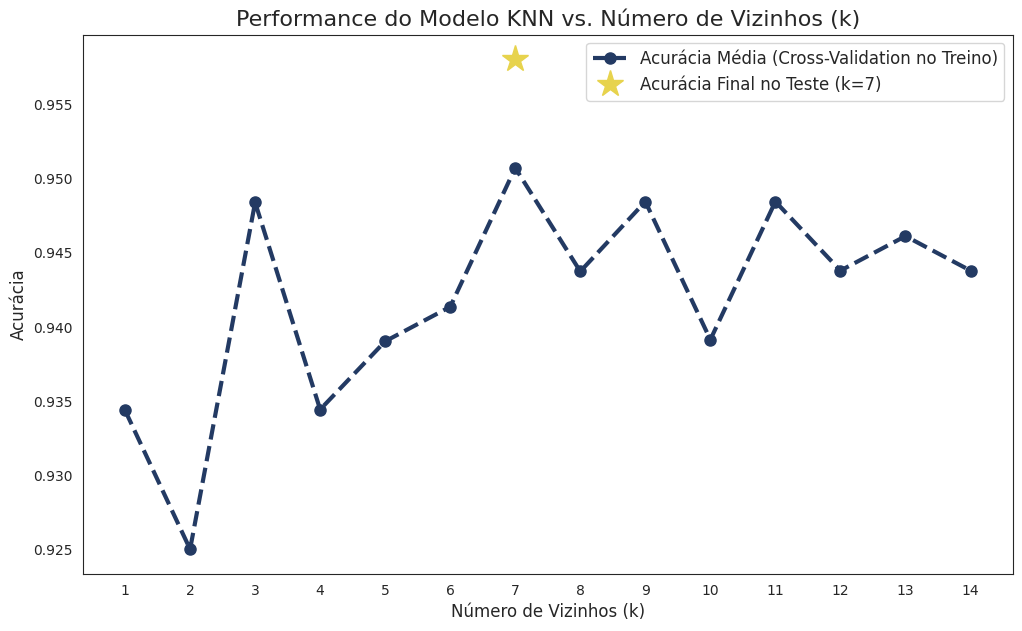

In [ ]:
# Vou plotar a curva da validação cruzada e o ponto de teste

# Aqui criei a figura para o meu gráfico
plt.figure(figsize=(12, 7))

# Plotei a curva de acurácia da validação cruzada (que chamei de 'tr_acc')
# Usei 'linewidth=3' para engrossar a linha, melhorando a visualização
plt.plot(k_set, tr_acc, label='Acurácia Média (Cross-Validation no Treino)', color='#233a63',
         linestyle='dashed', marker='o', markersize=8, linewidth=3)

# Destaquei o ponto único da performance final no conjunto de teste.
# As variáveis 'best_k' e 'accuracy' foram calculadas nas células anteriores.
plt.plot(best_k, accuracy, label=f'Acurácia Final no Teste (k={best_k})', color='#e7d34d',
         marker='*', markersize=20, linestyle='none') # 'linestyle='none'' para mostrar só a estrela

plt.title('Performance do Modelo KNN vs. Número de Vizinhos (k)', fontsize=16)
plt.ylabel('Acurácia', fontsize=12)
plt.xlabel('Número de Vizinhos (k)', fontsize=12)
plt.xticks(k_set) # Mostra todos os valores de k no eixo
# A linha abaixo foi removida para tirar a grade do gráfico
# plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show() # Mostra a figura

> Assim assumo que o melhor K para esse modelo é 7, pois o treino apresenta sua maior acurácia...

# Avaliação

Como o próprio nome sugere, esta etapa tem como objetivo interpretar os dados gerados e verificar se eles apresentam validade frente ao problema proposto.

Apresentaremos a seguir o *score*, a **acurácia** e a **matriz de confusão** do modelo quando aplicado com `K=7`. As principais observações que podemos extrair desses resultados são:

- **Score**: na maioria dos casos, o algoritmo demonstra alta *confiança* nas classificações realizadas.  

- **Acurácia**: o modelo atingiu uma acurácia de aproximadamente `93%`.  

- **Matriz de Confusão**: na avaliação do modelo, foram identificados:
  - `4` casos de **falsos negativos** (amostras malignas preditas como benignas);

  - `5` casos de **falsos positivos** (amostras benignas preditas como malignas);

  - `134` casos corretamente classificados.

Esses resultados indicam que o modelo apresenta um bom desempenho geral, mesmo com a presença de alguns erros de classificação.

> Ainda que os resultados teóricos exijam uma análise criteriosa, os indicadores de desempenho sugerem que o modelo possui boa capacidade preditiva.

## Cálculo de score

In [ ]:
# Metrificando o modelo
# Vou usar o 'best_k' que a validação cruzada me indicou, ou seja, o k=7

# Criei meu modelo KNN com o 'best_k' (k=7) que já tinha sido encontrado na validação cruzada
clf = KNeighborsClassifier(n_neighbors=7)

# Treinei o modelo, lembrando de usar meus dados de treino
clf.fit(x_train_scaled, y_train)

# Calculei as probabilidades no meu conjunto de teste
pred_scores = clf.predict_proba(x_test_scaled)

# Criei um dataframe para analisar as probabilidades junto com os rótulos
proba_df = pd.DataFrame(pred_scores, columns=clf.classes_)

# Usei idxmax para encontrar a classe com a maior probabilidade (que é a minha predição)
proba_df["Predito"] = proba_df.idxmax(axis=1)

# Adicionei a coluna com o valor real para poder comparar lado a lado
proba_df["Real"] = y_test.reset_index(drop=True)

# Ativei a formatação de tabela interativa do Google Colab
data_table.enable_dataframe_formatter()

# Mostrei as 20 primeiras linhas do meu dataframe de probabilidades
# Posso modificar aqui quantas linhas quero ver no dataframe exibido
proba_df.head(20)

B         M Predito Real
0   0.571429  0.428571       B    M
1   1.000000  0.000000       B    B
2   1.000000  0.000000       B    B
3   0.000000  1.000000       M    M
4   1.000000  0.000000       B    B
5   0.857143  0.142857       B    B
6   1.000000  0.000000       B    B
7   1.000000  0.000000       B    B
8   0.000000  1.000000       M    M
9   0.285714  0.714286       M    M
10  1.000000  0.000000       B    B
11  1.000000  0.000000       B    B
12  0.000000  1.000000       M    M
13  1.000000  0.000000       B    B
14  0.428571  0.571429       M    M
15  0.142857  0.857143       M    M
16  1.000000  0.000000       B    B
17  0.857143  0.142857       B    B
18  0.857143  0.142857       B    B
19  1.000000  0.000000       B    B

## Cálculo da acurácia

In [ ]:
# Fiz as predições no meu conjunto de teste
y_pred = clf.predict(x_test_scaled)

# Calculei a acurácia
te_acc = sklearn.metrics.accuracy_score(y_test, y_pred)

# Calculei o Coeficiente de Correlação de Matthews (uma ótima métrica para ajudar a visualizar se está havendo orverfitting)
mcc = sklearn.metrics.matthews_corrcoef(y_test, y_pred)

# Imprimi os resultados das métricas
print("Relatório de Classificação Final:")
print('\n')
report = sklearn.metrics.classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno'])
print(report)
print(f'Acurácia obtida foi de: {te_acc:.4f}')
print(f'Coeficiente de Matthews (MCC): {mcc:.4f}')

Relatório de Classificação Final:


              precision    recall  f1-score   support

     Benigno       0.96      0.98      0.97        91
     Maligno       0.96      0.92      0.94        52

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

Acurácia obtida foi de: 0.9580
Coeficiente de Matthews (MCC): 0.9090


## Matriz de confusão


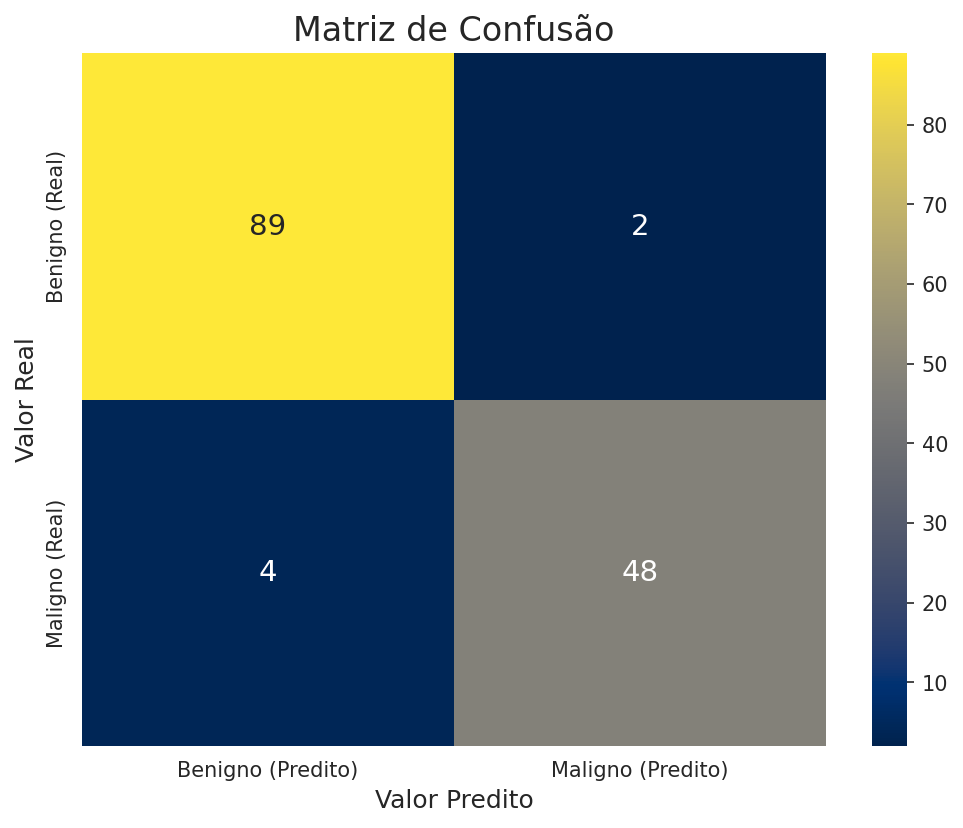

In [ ]:
# Matriz de Confusão
conf_mat = sklearn.metrics.confusion_matrix(y_test, y_pred)

# A primeira classe é 'Benigno' e a segunda é 'Maligno'.
df_cm = pd.DataFrame(conf_mat,
                     index=['Benigno (Real)', 'Maligno (Real)'],
                     columns=['Benigno (Predito)', 'Maligno (Predito)'])

# Criei o meu heatmap
plt.figure(figsize=(8, 6), dpi=150) # Ajustei o DPI para uma boa visualização
plt.title('Matriz de Confusão', fontsize=16)
sns.heatmap(df_cm, annot=True, cmap='cividis', fmt='d', annot_kws={"size": 14}) # Aumentei o tamanho da fonte da anotação

# Adicionei os rótulos dos eixos para maior clareza
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Predito', fontsize=12)
plt.show()

## Curva AUC-ROC


AUC-ROC obtida foi de: 0.9968




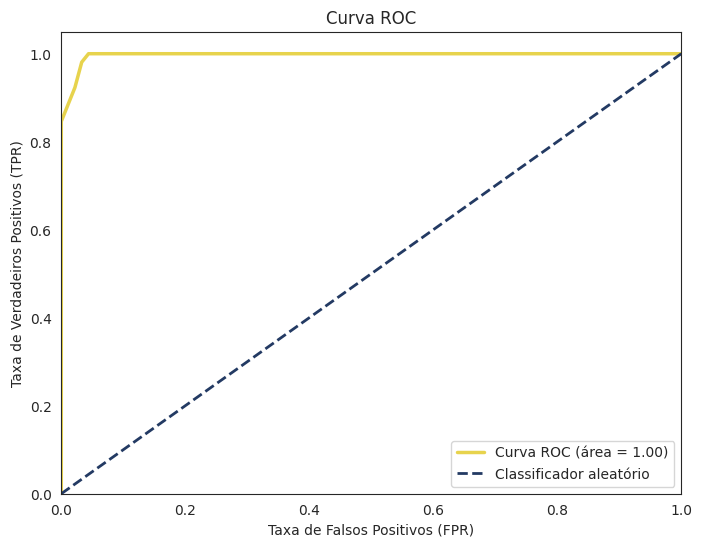

In [ ]:
# Calcular a Curva ROC especificando a classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='M')

# Calcular a Área Sob a Curva (AUC)
roc_auc = auc(fpr, tpr)

print(f'AUC-ROC obtida foi de: {roc_auc:.4f}')
print('\n') # Gambiarra para pular linha

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))

# Aqui estamos de volta (sim, mais uma vez) com o conceito de azul escuro (#233a63) para a categoria Benigno (B) e o amerelo sick (#e7d34d) para a categoria Maligno (M)
plt.plot(fpr, tpr, linewidth=2.5, color='#e7d34d', label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='#233a63', lw=2, linestyle='--', label='Classificador aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(False) # Remove the grid
plt.show()

# Conclusões Gerais

# Análise do Modelo K-NN na base de Câncer de Mama

## Visão geral da base

O **Wisconsin Breast Cancer Dataset** contém **569 amostras** de tecido mamário obtidas via exame de imagem, rotuladas como **Benigno (B)** (357 instâncias) e **Maligno (M)** (212 instâncias).

Cada amostra é descrita por **30 variáveis morfológicas**, medidas em três escalas:

| Sufixo     | Significado              | Exemplo                        |
|:----------:|--------------------------|-------------------------------|
| `_mean`    | Média dos valores        | `radius_mean`, `texture_mean` |
| `_se`      | Erro-padrão da média     | `radius_se`, `area_se`        |
| `_worst`   | Maior valor observado    | `perimeter_worst`, `concavity_worst` |

As features capturam:

- **Tamanho** – raio, perímetro, área  
- **Textura** – variação de intensidade de pixels  
- **Irregularidade da borda** – *smoothness*, *concavity*, *compactness*  
- **Simetria** e **complexidade fractal** do contorno

---

## Exploração e preparação dos dados

1. **Correlação**  
   - Detectamos pares com |r| > 0.9, como `radius_mean`, `perimeter_mean` e `area_mean`.  
   - Mantivemos apenas a variável mais representativa de cada grupo, reduzindo a multicolinearidade.

2. **Redução de dimensionalidade**  
   - Remoção das variáveis com sufixos `_se` e `_worst`, priorizando a escala `_mean`.

3. **Padronização**  
   - Aplicamos **StandardScaler()**, essa normalização é essencial em algoritmos **baseados em distância**, como o K-NN, pois evita que variáveis com escalas maiores dominem o cálculo da distância Euclidiana.

---

## Modelagem com K-NN

| Passo                | Detalhe                                                |
|----------------------|---------------------------------------------------------|
| **Divisão de dados** | 75% treino · 25% teste, estratificada                   |
| **Seleção de k**     | Avaliação de k = 1 a 14; melhor desempenho com **k = 7** |
| **Modelo final**     | `KNeighborsClassifier(n_neighbors=7)` (distância Euclidiana) |

---

## Resultados

### Matriz de confusão (k = 7)

|                      | **Predito: Benigno** | **Predito: Maligno** |
|----------------------|----------------------|-----------------------|
| **Real: Benigno**    | 89 (VN)              | 2 (FP)                |
| **Real: Maligno**    | 4 (FN)               | 48 (VP)               |

### Métricas principais

| Métrica                | Benigno | Maligno | Global     |
|------------------------|:-------:|:-------:|:----------:|
| **Precisão**           | 0.96    | 0.96    | —          |
| **Recall / Sensibilidade** | 0.98 | 0.92    | —          |
| **F1-score**           | 0.97    | 0.94    | —          |
| **Acurácia**           | —       | —       | **0.9580** |
| **MCC**                | —       | —       | **0.9090** |
| **AUC-ROC**            | —       | —       | **0.9968** |

---

## Interpretação

- O classificador apresenta **alta sensibilidade (92%)** para identificar tumores malignos, o que é crucial em contexto clínico, minimizando falsos-negativos.
- A **especificidade** é ainda maior (98%), reduzindo o risco de alarmes falsos e intervenções desnecessárias.
- A **acurácia global** de **95,8%** demonstra um desempenho robusto.
- O **coeficiente de Matthews (MCC = 0.9090)** evidencia uma excelente correlação entre as predições e os rótulos reais, mesmo em um cenário com classes desbalanceadas.
- A **curva ROC** mostra uma separação quase perfeita entre as classes, com **AUC = 0.9968**, indicando uma capacidade de discriminação muito elevada.
- O pré-processamento cuidadoso (remoção de colunas redundantes e padronização) teve papel fundamental para a estabilidade e eficácia do modelo.

---

## Próximos passos

- **Ajuste de limiar de decisão** (`predict_proba`) para minimizar ainda mais os falsos-negativos.
- Exploração de **modelos com penalização assimétrica** ou técnicas de **ensemble** (como SVM, Random Forest ou Gradient Boosting).
- Estudo da **importância das variáveis morfológicas** via métodos de permutação, para embasar a relevância biológica das features selecionadas.
- Testes com dados externos ou validação cruzada mais rigorosa para verificar generalização.

---

## Conclusão

A aplicação do modelo K-NN, com foco em seleção de atributos relevantes e pré-processamento adequado, resultou em um desempenho de **alto nível** na detecção de câncer de mama. Com **acurácia superior a 95%**, **AUC próxima a 1** e **baixo número de erros críticos**, o modelo se mostra uma ferramenta promissora para auxiliar na triagem diagnóstica, oferecendo suporte robusto à tomada de decisão médica.
